## LiMPIEZA   E INTREGACIÓN DE LOS DATOS EN UN DATSET DE UNA UNICA VISTA MINABLE.

In [1]:
# Librerias y dependencias
import pandas as pd
import numpy as np
from unidecode import  unidecode
import re
pd.options.display.max_columns = None

In [2]:
# Lectura de los diferntes datasets
Productions_Events = pd.read_csv("../Datos/Production_events_3.csv")
fields = pd.read_csv("../Datos/Fields_3.csv")
Productions_Events.tail(3)

,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA
995,4673,4321,4546,4785,8.853453,-75.751192,5/7/2016,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,5/12/2016,59800.0,7/2/2016,9/23/2016,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CÓRDOBA,CERETÉ,2.0
996,4674,4320,4545,4784,9.034286,-75.780458,5/9/2016,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,5/15/2016,70000.0,7/3/2016,9/21/2016,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CÓRDOBA,COTORRA,2.2
997,4675,4319,4544,4784,9.031350,-75.779953,5/9/2016,Mecanizado,17.8,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,P3966 (Pioneer),6400.0,Algodón,SI,5/14/2016,67600.0,7/5/2016,9/21/2016,Mecanizada,6440.0,Grano seco,CARACOL,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14812.0,18.0,NO,NaN,CÓRDOBA,COTORRA,2.3


In [3]:
Productions_Events.columns

Index(['ID_EVENTO', 'ID_LOTE', 'ID_FINCA', 'ID_PROD', 'LAT_LOTE', 'LONG_LOTE',
       'FECHA_SIEMBRA', 'TIPO_SIEMBRA', 'NUM_SEMILLAS', 'SEM_TRATADAS',
       'DIST_SURCOS', 'DIST_PLANTAS', 'TIPO_CULTIVO', 'COLOR_ENDOSPERMO',
       'SEM_POR_SITIO', 'TIPO_DE_SEMILLA', 'HABITO_CRECIMIENTO',
       'MATERIAL_GENETICO', 'OBJ_RDT', 'CULT_ANT', 'DRENAJE',
       'FECHA_EMERGENCIA', 'POBLACION_20DIAS', 'FECHA_FLORACION',
       'FECHA_COSECHA', 'METODO_COSECHA', 'RDT', 'PROD_COSECHADO',
       'NOMBRE_LOTE', 'ORIGEN_SEMILLA', 'INOCULACION_SEMILLAS',
       'NUEVA_INOCULACION_SEMILLAS', 'PRODUCTO_USADO', 'TIPO_MATERIAL',
       'NUEVO_MATERIAL_GENETICO', 'OTRO_CULT_ANT', 'RESIEMBRA',
       'CANTIDAD_TOTAL', 'HUMEDAD', 'ALMACENAMIENTO_FINCA',
       'OBSERVACIONES_COSECHA', 'DEPARTAMENTO', 'MUNICIPIO', 'AREA'],
      dtype='object')

In [4]:
# Se extrae las columnas ID_LOTE y ALTURA_LOT del data.frame y las almacena en nuevas variables
Altura_Lotes = fields[["ID_LOTE","ALTURA_LOT"]]
Altura_Lotes.head(3)

,ID_LOTE,ALTURA_LOT
0,1425,1638
1,1489,1637
2,861,1694


In [5]:
Productions_Events.PROD_COSECHADO.value_counts()

Grano seco          885
Ensilaje             64
Mazorca (fresca)     37
Name: PROD_COSECHADO, dtype: int64

In [6]:
# Se obtienen una copia del dataframe original para su posterior procesamiento
eventos = Productions_Events.copy()
# Filtrar departamento de cordoba, y municipios de interes 
# ===========================================================================
# Se realiza limpieza de datos para las columnas departamento y municipio donde
# se puede evicenciar problemas en el acento.
eventos.DEPARTAMENTO = eventos.DEPARTAMENTO.apply(lambda x: x.replace("Ó","O"))
eventos.MUNICIPIO = eventos.MUNICIPIO.apply(lambda s: unidecode(s))
# Se crea un vector -lista que contiene los departamentos unicos
filDep = eventos.DEPARTAMENTO.unique()[0]
print(filDep)
# Se filtra el dataset para que contenga los registros unicamnete en el departamento
# de cordoba y los registros unicmanete coincidan con el tipo de producto grano seco
evento_cordoba = eventos[(eventos.DEPARTAMENTO=='CORDOBA') & (eventos.PROD_COSECHADO=="Grano seco")]
print("Dimensiones: ",evento_cordoba.shape)
evento_cordoba.tail(5)

CORDOBA
Dimensiones:  (885, 44)


,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA
993,4671,4323,4548,4787,9.018844,-75.758531,5/21/2016,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,5300.0,Maiz,SI,5/25/2016,64200.0,7/13/2016,10/4/2016,Manual,7150.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,SV-1035,NaN,NaN,7150.0,17.0,NO,NaN,CORDOBA,SAN PELAYO,1.0
994,4672,4322,4547,4786,8.871503,-75.772411,5/14/2016,Mecanizado,19.2,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,6980.0,Maiz,SI,5/20/2016,60000.0,7/8/2016,9/30/2016,Mecanizada,6200.0,Grano seco,SALSIPUEDES,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,13020.0,17.0,NO,NaN,CORDOBA,CERETE,2.1
995,4673,4321,4546,4785,8.853453,-75.751192,5/7/2016,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,5/12/2016,59800.0,7/2/2016,9/23/2016,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CORDOBA,CERETE,2.0
996,4674,4320,4545,4784,9.034286,-75.780458,5/9/2016,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,5/15/2016,70000.0,7/3/2016,9/21/2016,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CORDOBA,COTORRA,2.2
997,4675,4319,4544,4784,9.031350,-75.779953,5/9/2016,Mecanizado,17.8,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,P3966 (Pioneer),6400.0,Algodón,SI,5/14/2016,67600.0,7/5/2016,9/21/2016,Mecanizada,6440.0,Grano seco,CARACOL,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14812.0,18.0,NO,NaN,CORDOBA,COTORRA,2.3


In [7]:
evento_cordoba.CULT_ANT.unique()

array(['Algodón', 'Maiz', 'Frijol', 'Yuca', 'Pastos', nan], dtype=object)

In [8]:
# Se realiza el mismo tratamineto a la columna CULT_ANT
#evento_cordoba.CULT_ANT = evento_cordoba.CULT_ANT.astype(str)
#evento_cordoba.CULT_ANT = evento_cordoba.CULT_ANT.apply(lambda y: y.upper)

In [9]:
# Se Elimina observaciones donde los lotes tenian una extension menor a una area y los valores de rendimiento, poblacion
# no coinciden
lista_Observaciones_Eliminar = [2685,2690,2692]
# se filtra el datset mediante estas observaciones
evento_cordoba = evento_cordoba[evento_cordoba.ID_LOTE.isin(lista_Observaciones_Eliminar)== False]
print(len(evento_cordoba.columns))
evento_cordoba.tail(5)


44


,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA
993,4671,4323,4548,4787,9.018844,-75.758531,5/21/2016,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,5300.0,Maiz,SI,5/25/2016,64200.0,7/13/2016,10/4/2016,Manual,7150.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,SV-1035,NaN,NaN,7150.0,17.0,NO,NaN,CORDOBA,SAN PELAYO,1.0
994,4672,4322,4547,4786,8.871503,-75.772411,5/14/2016,Mecanizado,19.2,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,6980.0,Maiz,SI,5/20/2016,60000.0,7/8/2016,9/30/2016,Mecanizada,6200.0,Grano seco,SALSIPUEDES,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,13020.0,17.0,NO,NaN,CORDOBA,CERETE,2.1
995,4673,4321,4546,4785,8.853453,-75.751192,5/7/2016,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,5/12/2016,59800.0,7/2/2016,9/23/2016,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CORDOBA,CERETE,2.0
996,4674,4320,4545,4784,9.034286,-75.780458,5/9/2016,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,5/15/2016,70000.0,7/3/2016,9/21/2016,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CORDOBA,COTORRA,2.2
997,4675,4319,4544,4784,9.031350,-75.779953,5/9/2016,Mecanizado,17.8,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,P3966 (Pioneer),6400.0,Algodón,SI,5/14/2016,67600.0,7/5/2016,9/21/2016,Mecanizada,6440.0,Grano seco,CARACOL,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14812.0,18.0,NO,NaN,CORDOBA,COTORRA,2.3


In [10]:
#  AJUSTE DEL RENDIMIENTO R-AJUT A UNA VALOR MAS REAL
# ==============================================================================
evento_cordoba["RDT_AJUSTADO"] = (100 -evento_cordoba.HUMEDAD)/(100-14)*evento_cordoba.RDT
print(len(evento_cordoba.columns))
evento_cordoba.tail(10)

45


,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA,RDT_AJUSTADO
988,4666,4165,4391,4718,9.094833,-75.783186,5/23/2016,Mecanizado,18.0,NO,0.8,0.20,Maiz,Amarillo,1.0,NaN,NaN,Otro,6100.0,Algodón,SI,5/28/2016,59000.0,7/19/2016,10/8/2016,Mecanizada,6160.0,Grano seco,LAS MARIAS,NaN,NaN,NaN,NaN,OGM,DK 7088 VTPRO,NaN,NaN,20910.0,18.0,NO,NaN,CORDOBA,COTORRA,3.4,5873.488372
989,4667,4161,4387,4716,9.075958,-75.721369,5/8/2016,Mecanizado,18.5,NO,0.8,0.18,Maiz,Amarillo,1.0,NaN,NaN,ADV 9293 (Syngenta),7200.0,Algodón,SI,5/14/2016,67000.0,7/4/2016,9/24/2016,Manual,7000.0,Grano seco,LA ESPERANZA,NaN,NaN,NaN,NaN,Hibrido,NaN,NaN,NaN,32200.0,18.0,NO,NaN,CORDOBA,CHIMA,4.6,6674.418605
990,4668,4160,4386,4716,9.073700,-75.720725,5/8/2016,Mecanizado,18.0,NO,0.8,0.18,Maiz,Amarillo,1.0,NaN,NaN,Otro,7800.0,Algodón,SI,5/13/2016,70000.0,7/2/2016,9/26/2016,Mecanizada,7000.0,Grano seco,LA COMPAÑIA,NaN,NaN,NaN,NaN,Hibrido,SV 1035,NaN,NaN,30100.0,18.0,NO,NaN,CORDOBA,CHIMA,4.3,6674.418605
991,4669,4256,4484,4752,9.076806,-75.726611,5/23/2016,Mecanizado,18.2,NO,0.8,0.20,Maiz,Amarillo,1.0,NaN,NaN,Otro,6780.0,Algodón,SI,5/28/2016,60000.0,7/17/2016,10/10/2016,Mecanizada,6500.0,Grano seco,LA ESPERANZA,NaN,NaN,NaN,NaN,Hibrido,ADT-9293,NaN,NaN,14300.0,18.0,NO,NaN,CORDOBA,COTORRA,2.2,6197.674419
992,4670,4268,4496,4756,9.086806,-75.735900,5/11/2016,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,7100.0,Maiz,SI,5/17/2016,61000.0,7/5/2016,9/22/2016,Manual,6980.0,Grano seco,EL CAMPANITO,NaN,NaN,NaN,NaN,Hibrido,ADT-9339,NaN,NaN,6980.0,17.0,NO,NaN,CORDOBA,COTORRA,1.0,6736.511628
993,4671,4323,4548,4787,9.018844,-75.758531,5/21/2016,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,5300.0,Maiz,SI,5/25/2016,64200.0,7/13/2016,10/4/2016,Manual,7150.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,SV-1035,NaN,NaN,7150.0,17.0,NO,NaN,CORDOBA,SAN PELAYO,1.0,6900.581395
994,4672,4322,4547,4786,8.871503,-75.772411,5/14/2016,Mecanizado,19.2,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,6980.0,Maiz,SI,5/20/2016,60000.0,7/8/2016,9/30/2016,Mecanizada,6200.0,Grano seco,SALSIPUEDES,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,13020.0,17.0,NO,NaN,CORDOBA,CERETE,2.1,5983.720930
995,4673,4321,4546,4785,8.853453,-75.751192,5/7/2016,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,5/12/2016,59800.0,7/2/2016,9/23/2016,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CORDOBA,CERETE,2.0,6105.325581
996,4674,4320,4545,4784,9.034286,-75.780458,5/9/2016,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,5/15/2016,70000.0,7/3/2016,9/21/2016,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CORDOBA,COTORRA,2.2,6216.279070
997,4675,4319,4544,4784,9.031350,-75.779953,5/9/2016,Mecanizado,17.8,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,P3966 (Pioneer),6400.0,Algodón,SI,5/14/2016,67600.0,7/5/2016,9/21/2016,Mecanizada,6440.0,Grano seco,CARACOL,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14812.0,18.0,NO,NaN,CORDOBA,COTORRA,2.3,6140.465116


### AJUSTE DE LAS FECHAS

In [11]:
# Inicilamnete se identifica las columnas que empiezan con el nombre fecha
# FECHA_SIEMBRA
# FECHA_EMERGENCIA
# FECHA_FLORACION
# FECHA_COSECHA
evento_cordoba.columns

Index(['ID_EVENTO', 'ID_LOTE', 'ID_FINCA', 'ID_PROD', 'LAT_LOTE', 'LONG_LOTE',
       'FECHA_SIEMBRA', 'TIPO_SIEMBRA', 'NUM_SEMILLAS', 'SEM_TRATADAS',
       'DIST_SURCOS', 'DIST_PLANTAS', 'TIPO_CULTIVO', 'COLOR_ENDOSPERMO',
       'SEM_POR_SITIO', 'TIPO_DE_SEMILLA', 'HABITO_CRECIMIENTO',
       'MATERIAL_GENETICO', 'OBJ_RDT', 'CULT_ANT', 'DRENAJE',
       'FECHA_EMERGENCIA', 'POBLACION_20DIAS', 'FECHA_FLORACION',
       'FECHA_COSECHA', 'METODO_COSECHA', 'RDT', 'PROD_COSECHADO',
       'NOMBRE_LOTE', 'ORIGEN_SEMILLA', 'INOCULACION_SEMILLAS',
       'NUEVA_INOCULACION_SEMILLAS', 'PRODUCTO_USADO', 'TIPO_MATERIAL',
       'NUEVO_MATERIAL_GENETICO', 'OTRO_CULT_ANT', 'RESIEMBRA',
       'CANTIDAD_TOTAL', 'HUMEDAD', 'ALMACENAMIENTO_FINCA',
       'OBSERVACIONES_COSECHA', 'DEPARTAMENTO', 'MUNICIPIO', 'AREA',
       'RDT_AJUSTADO'],
      dtype='object')

In [12]:
# Se verifica el tipo de dato de als columnas
evento_cordoba.FECHA_SIEMBRA

0      5/13/2013
1       5/2/2013
2      5/12/2013
3       5/7/2013
4       5/7/2013
         ...    
993    5/21/2016
994    5/14/2016
995     5/7/2016
996     5/9/2016
997     5/9/2016
Name: FECHA_SIEMBRA, Length: 882, dtype: object

In [13]:
# se realiza la conversion de las columnas fecha a tipo data-time

evento_cordoba.FECHA_SIEMBRA = pd.to_datetime(evento_cordoba.FECHA_SIEMBRA, infer_datetime_format=True)
evento_cordoba.FECHA_EMERGENCIA = pd.to_datetime(evento_cordoba.FECHA_EMERGENCIA, infer_datetime_format=True)
evento_cordoba.FECHA_FLORACION = pd.to_datetime(evento_cordoba.FECHA_FLORACION, infer_datetime_format=True)
evento_cordoba.FECHA_COSECHA = pd.to_datetime(evento_cordoba.FECHA_COSECHA, infer_datetime_format=True)


In [14]:
# Se calcula la diferencia en dias entre cada una de las etapas del cultivo
evento_cordoba["DIAS_EN_EMERGER"] = (evento_cordoba.FECHA_EMERGENCIA- evento_cordoba.FECHA_SIEMBRA)
evento_cordoba["DIAS_EN_EMERGER_A_FLORECER"] = (evento_cordoba.FECHA_FLORACION- evento_cordoba.FECHA_EMERGENCIA)
evento_cordoba["DIAS_EN_FLORECER_A_COSECHAR"] = (evento_cordoba.FECHA_COSECHA- evento_cordoba.FECHA_FLORACION)

In [15]:
evento_cordoba

,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA,RDT_AJUSTADO,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR
0,53,40,42,13,8.877222,-75.764444,2013-05-13,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,2.0,NaN,NaN,PIONEER 30F32,5000.0,Algodón,SI,2013-05-18,60000.0,2013-07-20,2013-09-26,Manual,5000.0,Grano seco,VILLA GABRIELA,NaN,NaN,NaN,NaN,Hibrido,NaN,NaN,NaN,5000.0,18.0,NO,NaN,CORDOBA,CERETE,1.0,4767.441860,5 days,63 days,68 days
1,54,43,43,14,8.879167,-75.765556,2013-05-02,Mecanizado,60000.0,SI,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,DK 234,5.0,Maiz,SI,2013-05-07,60000.0,2013-07-10,2013-09-11,Manual,5000.0,Grano seco,VILLA LOURDES,NaN,NaN,NaN,Insecticidas,Hibrido,NaN,NaN,NaN,5000.0,20.0,NO,NaN,CORDOBA,CERETE,1.0,4651.162791,5 days,64 days,63 days
2,56,44,44,15,8.880000,-75.765833,2013-05-12,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,PIONEER 30F32,5.0,Algodón,SI,2013-05-17,60000.0,2013-07-15,2013-09-19,Manual,5500.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,NaN,NaN,NaN,5500.0,19.0,NO,NaN,CORDOBA,CERETE,1.0,5180.232558,5 days,59 days,66 days
3,57,45,45,16,8.878611,-75.758889,2013-05-07,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,5.0,Algodón,SI,2013-05-12,60000.0,2013-07-15,2013-09-12,Manual,5200.0,Grano seco,PALMAR,NaN,NaN,NaN,NaN,Hibrido,7019,NaN,NaN,5200.0,19.0,NO,NaN,CORDOBA,CERETE,1.0,4897.674419,5 days,64 days,59 days
4,273,46,46,17,8.876389,-75.759167,2013-05-07,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,5000.0,Algodón,SI,2013-05-12,60000.0,2013-07-14,2013-09-12,Manual,5700.0,Grano seco,DONDE FIDEL,NaN,NaN,NaN,NaN,Hibrido,7019,NaN,NaN,5700.0,20.0,NO,NaN,CORDOBA,CERETE,1.0,5302.325581,5 days,63 days,60 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,4671,4323,4548,4787,9.018844,-75.758531,2016-05-21,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,5300.0,Maiz,SI,2016-05-25,64200.0,2016-07-13,2016-10-04,Manual,7150.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,SV-1035,NaN,NaN,7150.0,17.0,NO,NaN,CORDOBA,SAN PELAYO,1.0,6900.581395,4 days,49 days,83 days
994,4672,4322,4547,4786,8.871503,-75.772411,2016-05-14,Mecanizado,19.2,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,6980.0,Maiz,SI,2016-05-20,60000.0,2016-07-08,2016-09-30,Mecanizada,6200.0,Grano seco,SALSIPUEDES,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,13020.0,17.0,NO,NaN,CORDOBA,CERETE,2.1,5983.720930,6 days,49 days,84 days
995,4673,4321,4546,4785,8.853453,-75.751192,2016-05-07,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,2016-05-12,59800.0,2016-07-02,2016-09-23,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CORDOBA,CERETE,2.0,6105.325581,5 days,51 days,83 days
996,4674,4320,4545,4784,9.034286,-75.780458,2016-05-09,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,2016-05-15,70000.0,2016-07-03,2016-09-21,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CORDOBA,COTORRA,2.2,6216.279070,6 days,49 days,80 days


In [16]:
# Se ajusta el numero de plantas contadas a los 20 dias
evento_cordoba.POBLACION_20DIAS.describe()

count       875.000000
mean      63815.344000
std        9324.471838
min        6000.000000
25%       60000.000000
50%       62500.000000
75%       71000.000000
max      180000.000000
Name: POBLACION_20DIAS, dtype: float64

In [17]:
evento_cordoba.AREA.describe()

count    882.000000
mean       4.010658
std        5.670576
min        1.000000
25%        1.125000
50%        2.000000
75%        4.000000
max       55.000000
Name: AREA, dtype: float64

In [18]:
# Segun observaciones de los agricultores la FIAT Y FENALCE en una AREA no puede existir mas de  90.000 plantas
# por tal motivo puede darse el caso que un agricultor no realizo a decuadamente la captura de estos datos e información
# se debe Ajustar ese valor de area

# Funcion para realizar el ajuste de los 20 dias
def PoblacionAjustada(pob_20_dias,area):
    # Solamante para verificar que el ajuste y la introduccion de los datos se realizo de manera correcta.
    if pob_20_dias < 90000:
        poblacion = pob_20_dias
    else:
        poblacion = pob_20_dias/area
    
    return poblacion

# Funcion para realizar el ajuste de las fechas dejando unicmanete la cantidad numerica.


In [19]:
# Se realiza el ajuste de la población a los 20 dias
evento_cordoba["POBLACION_20DIAS_AJT"] = evento_cordoba.POBLACION_20DIAS.apply(lambda x: PoblacionAjustada(x,evento_cordoba.AREA))

In [20]:
evento_cordoba.POBLACION_20DIAS_AJT

0      60000.0
1      60000.0
2      60000.0
3      60000.0
4      60000.0
        ...   
993    64200.0
994    60000.0
995    59800.0
996    70000.0
997    67600.0
Name: POBLACION_20DIAS_AJT, Length: 882, dtype: object

In [21]:
# Se recupera unicamnete los registros pertenecientes al departamento de cordoba
print("Ids Unicos extraidos del fichero LOTES(Fields): ",len(Altura_Lotes.ID_LOTE.unique()))
print("IDs unicos del departamento de Cordoba: ", len(evento_cordoba.ID_LOTE.unique()))

Ids Unicos extraidos del fichero LOTES(Fields):  4004
IDs unicos del departamento de Cordoba:  882


In [22]:
Lista_ID_unicos_cordoba = list (evento_cordoba.ID_LOTE.unique())
Lista_ID_unicos_cordoba[0:10]

[40, 43, 44, 45, 46, 47, 51, 268, 269, 270]

In [23]:
#se recupera unicamente los registros del deparatamento de cordoba  - para el fichero lotes
# Donde se tienen cada uno de los lotes asociados al departamento

Altura_Lotes = Altura_Lotes[Altura_Lotes.ID_LOTE.isin(Lista_ID_unicos_cordoba)]
Altura_Lotes.shape

(882, 2)

In [24]:
# Al dataframe eventos cordoba adicionamos la columna altura lote del fichero (Altura Lotes)
evento_cordoba = pd.merge( evento_cordoba,Altura_Lotes)

In [25]:
evento_cordoba

,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA,RDT_AJUSTADO,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT
0,53,40,42,13,8.877222,-75.764444,2013-05-13,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,2.0,NaN,NaN,PIONEER 30F32,5000.0,Algodón,SI,2013-05-18,60000.0,2013-07-20,2013-09-26,Manual,5000.0,Grano seco,VILLA GABRIELA,NaN,NaN,NaN,NaN,Hibrido,NaN,NaN,NaN,5000.0,18.0,NO,NaN,CORDOBA,CERETE,1.0,4767.441860,5 days,63 days,68 days,60000.0,13
1,54,43,43,14,8.879167,-75.765556,2013-05-02,Mecanizado,60000.0,SI,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,DK 234,5.0,Maiz,SI,2013-05-07,60000.0,2013-07-10,2013-09-11,Manual,5000.0,Grano seco,VILLA LOURDES,NaN,NaN,NaN,Insecticidas,Hibrido,NaN,NaN,NaN,5000.0,20.0,NO,NaN,CORDOBA,CERETE,1.0,4651.162791,5 days,64 days,63 days,60000.0,15
2,56,44,44,15,8.880000,-75.765833,2013-05-12,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,PIONEER 30F32,5.0,Algodón,SI,2013-05-17,60000.0,2013-07-15,2013-09-19,Manual,5500.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,NaN,NaN,NaN,5500.0,19.0,NO,NaN,CORDOBA,CERETE,1.0,5180.232558,5 days,59 days,66 days,60000.0,12
3,57,45,45,16,8.878611,-75.758889,2013-05-07,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,5.0,Algodón,SI,2013-05-12,60000.0,2013-07-15,2013-09-12,Manual,5200.0,Grano seco,PALMAR,NaN,NaN,NaN,NaN,Hibrido,7019,NaN,NaN,5200.0,19.0,NO,NaN,CORDOBA,CERETE,1.0,4897.674419,5 days,64 days,59 days,60000.0,12
4,273,46,46,17,8.876389,-75.759167,2013-05-07,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,5000.0,Algodón,SI,2013-05-12,60000.0,2013-07-14,2013-09-12,Manual,5700.0,Grano seco,DONDE FIDEL,NaN,NaN,NaN,NaN,Hibrido,7019,NaN,NaN,5700.0,20.0,NO,NaN,CORDOBA,CERETE,1.0,5302.325581,5 days,63 days,60 days,60000.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,4671,4323,4548,4787,9.018844,-75.758531,2016-05-21,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,5300.0,Maiz,SI,2016-05-25,64200.0,2016-07-13,2016-10-04,Manual,7150.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,SV-1035,NaN,NaN,7150.0,17.0,NO,NaN,CORDOBA,SAN PELAYO,1.0,6900.581395,4 days,49 days,83 days,64200.0,18
878,4672,4322,4547,4786,8.871503,-75.772411,2016-05-14,Mecanizado,19.2,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,6980.0,Maiz,SI,2016-05-20,60000.0,2016-07-08,2016-09-30,Mecanizada,6200.0,Grano seco,SALSIPUEDES,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,13020.0,17.0,NO,NaN,CORDOBA,CERETE,2.1,5983.720930,6 days,49 days,84 days,60000.0,16
879,4673,4321,4546,4785,8.853453,-75.751192,2016-05-07,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,2016-05-12,59800.0,2016-07-02,2016-09-23,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CORDOBA,CERETE,2.0,6105.325581,5 days,51 days,83 days,59800.0,16
880,4674,4320,4545,4784,9.034286,-75.780458,2016-05-09,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,2016-05-15,70000.0,2016-07-03,2016-09-21,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CORDOBA,COTORRA,2.2,6216.279070,6 days,49 days,80 days,70000.0,17


In [26]:
print("Cantidad de variables antes de eliminar: ",len(evento_cordoba.columns))

Cantidad de variables antes de eliminar:  50


In [27]:
# Se extraen las columnas clave , que se seran utilizadas para cruzar otro tipo de información

eventosParaFechas =evento_cordoba[["ID_EVENTO","ID_LOTE","FECHA_SIEMBRA","FECHA_EMERGENCIA","FECHA_COSECHA","FECHA_FLORACION"]]
eventosParaFechas.tail(2)

,ID_EVENTO,ID_LOTE,FECHA_SIEMBRA,FECHA_EMERGENCIA,FECHA_COSECHA,FECHA_FLORACION
880,4674,4320,2016-05-09,2016-05-15,2016-09-21,2016-07-03
881,4675,4319,2016-05-09,2016-05-14,2016-09-21,2016-07-05


In [28]:
# Se seleccionan las columnas que podran ser utilizadas para  calculos climaticos 

variablesClima = ["ID_EVENTO","ID_LOTE","ID_FINCA","ID_PROD","FECHA_SIEMBRA","LAT_LOTE","LONG_LOTE","FECHA_EMERGENCIA","FECHA_FLORACION","FECHA_COSECHA","DEPARTAMENTO","MUNICIPIO","PROD_COSECHADO","RDT_AJUSTADO"]
evenParaClima = evento_cordoba[variablesClima]
evenParaClima.tail(2)


,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,FECHA_SIEMBRA,LAT_LOTE,LONG_LOTE,FECHA_EMERGENCIA,FECHA_FLORACION,FECHA_COSECHA,DEPARTAMENTO,MUNICIPIO,PROD_COSECHADO,RDT_AJUSTADO
880,4674,4320,4545,4784,2016-05-09,9.034286,-75.780458,2016-05-15,2016-07-03,2016-09-21,CORDOBA,COTORRA,Grano seco,6216.279070
881,4675,4319,4544,4784,2016-05-09,9.031350,-75.779953,2016-05-14,2016-07-05,2016-09-21,CORDOBA,COTORRA,Grano seco,6140.465116


##### COLUMNAS A ELIMINAAR
- Se eliminan las siguientes columnas por ser identificadores: ID_PROD, ID_FINCA, DEPARTAMENTO, MUNICIPIO
- Por ser utilizadas para la generacion de columnas derivadas: LAT_LOTE, LONG_LOTE, RDT, FECHA_SIEMBRA, FECHA_EMERGENCIA, FECHA_FLORACION, FECHA_COSECHA, POBLACION_20DIAS, HUMEDAD, RDT, CANTIDAD_TOTAL
- Demasiados datos faltantes: RESIEMBRA, OBSERVACIONES_COSECHA
- Inconsistencias en las unidades de medidas: NUM_SEMILLAS v2
- Mal recolectada lainformacion segun expertos de la FIAT y FENALCE: DIST_PLANTAS,DIST_SURCOS,SEM_POR_SITIO,COLOR_ENDOSPERMO,TIPO_MATERIAL

In [29]:
# se eliminar todas la columnas  del datset Original
VariablesEliminar  = ["ID_PROD","ID_FINCA","LAT_LOTE","LONG_LOTE","TIPO_CULTIVO","TIPO_DE_SEMILLA","HABITO_CRECIMIENTO","OBJ_RDT","RDT","NOMBRE_LOTE","ORIGEN_SEMILLA","INOCULACION_SEMILLAS","NUEVA_INOCULACION_SEMILLAS","HUMEDAD","OBSERVACIONES_COSECHA","DEPARTAMENTO","MUNICIPIO",
                     "NUM_SEMILLAS","CANTIDAD_TOTAL","FECHA_SIEMBRA","FECHA_EMERGENCIA","FECHA_FLORACION","FECHA_COSECHA","PROD_COSECHADO","NUEVO_MATERIAL_GENETICO","OTRO_CULT_ANT","PRODUCTO_USADO","RESIEMBRA","POBLACION_20DIAS","DIST_PLANTAS","DIST_SURCOS"
                     ,"SEM_POR_SITIO","COLOR_ENDOSPERMO","TIPO_MATERIAL"]


evento_cordoba = evento_cordoba.drop(VariablesEliminar,axis=1)
print("Cantidad de variables despues de eliminar: ",len(evento_cordoba.columns))

Cantidad de variables despues de eliminar:  16


In [30]:
# Se guarda toda esa informacione en un Archivo exel para posterior analizar y procesamiento
evenParaClima.to_excel("../Archivos Generados/cordoba_clima.xlsx")
evento_cordoba.to_excel("../Archivos Generados/eventos_cordoba_2017.xlsx")

## PROCESAMIENTO PARA EL ARCHIVO CONTROLS

In [31]:
# Lectura del archivo controls
# lectura del archivo
controls = pd.read_csv("../Datos/Controls_3.csv")

In [32]:
print("Cantidad de registros Iniciales en el datset: ",controls.shape)
controls.head(2)

Cantidad de registros Iniciales en el datset:  (7590, 6)


,ID_EVENTO,ID_PROD,FECHA_CONTROL,TIPO_OBJETIVO,TIPO_CONTROL,MOLECULA_ACTIVA
0,16,34,5/1/2013,Plagas,Químico,PROFENOFOS 50% + LUFENURON
1,16,34,5/1/2013,Malezas,Químico,Glifosato


In [33]:
# Se recuperan unicamante los registros pertenecientes al departamento de Cordoba
Lista_IDEvento_Unicos_cordoba = list (evento_cordoba.ID_EVENTO.unique())
print("Cantidad de eventos unicos del departamento de cordoba: ", len(Lista_IDEvento_Unicos_cordoba))

Cantidad de eventos unicos del departamento de cordoba:  882


Cantidad de registro de controles filtrados de acuerdo al ID Evento:  3128


<AxesSubplot:>

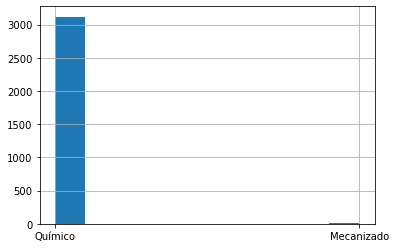

In [34]:
# Se filtra el dataset controls con los IDs Eventos unicos pertenecientes a dicho departamento
controls = controls[controls.ID_EVENTO.isin(Lista_IDEvento_Unicos_cordoba)]
print("Cantidad de registro de controles filtrados de acuerdo al ID Evento: ", len(controls))
# Diagrama de frecuencias del tipo de control

controls.TIPO_CONTROL.hist()

In [35]:
# resumen del datset controls
controls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3128 entries, 45 to 7395
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID_EVENTO        3128 non-null   int64 
 1   ID_PROD          3128 non-null   int64 
 2   FECHA_CONTROL    3128 non-null   object
 3   TIPO_OBJETIVO    3128 non-null   object
 4   TIPO_CONTROL     3128 non-null   object
 5   MOLECULA_ACTIVA  3119 non-null   object
dtypes: int64(2), object(4)
memory usage: 171.1+ KB


In [36]:
# Eliminar los registros duplicados
controls_duplicados = controls.copy()
controls_duplicados.duplicated()
# Si solamente tienen diferente el ID no se eliminan
controls_duplicados= controls_duplicados.drop_duplicates()
# Aqui se elimina 2 duplicados Unicmanete
controls_duplicados.shape

(3126, 6)

In [37]:
# Eliminamos los duplicados  teniendo en cuenta la variable Original
controls = controls.drop_duplicates()
controls.shape

(3126, 6)

In [38]:
controls.TIPO_CONTROL

45      Químico
46      Químico
47      Químico
48      Químico
49      Químico
         ...   
7391    Químico
7392    Químico
7393    Químico
7394    Químico
7395    Químico
Name: TIPO_CONTROL, Length: 3126, dtype: object

In [39]:
def funcionConcatenarTexto(cadena1,cadena2):
    nuevacadena = "cont"+cadena1[0:3]+cadena2[0:3]
    return nuevacadena

#print(funcionConcatenarTexto("perro","Labrador"))

In [40]:
# Se adiciona una nueva columna y en esta se va almacenado un String que contiene la siguiente concatenacion:
# Cont + las 3 primeras letras del valor en la columna tipo_objetivo + las 3 primeras letras del valor en la columna tipo_control.
# Ref: https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7

controls["ContTip"] = controls.apply(lambda x: funcionConcatenarTexto(x.TIPO_OBJETIVO,x.TIPO_CONTROL),axis=1)


In [41]:
# Verificacion de la nueva columna
controls.ContTip

45      contPlaQuí
46      contMalQuí
47      contPlaQuí
48      contMalQuí
49      contMalQuí
           ...    
7391    contMalQuí
7392    contPlaQuí
7393    contMalQuí
7394    contPlaQuí
7395    contMalQuí
Name: ContTip, Length: 3126, dtype: object

In [42]:
# Se genera una tabla donde por cada valor de la columna id_evento se observa el numero de repeticiones en los valores encontrados en la columna ContTip
# dicho de otro modo: cantidad de controles hechas de cada objetivo y tipo en cada siembra

cont = pd.crosstab(index=controls.ID_EVENTO, columns=controls.ContTip)
cont

ContTip,contEnfQuí,contMalMec,contMalQuí,contPlaQuí
ID_EVENTO,,,,
53,0,0,1,1
54,0,0,1,1
56,0,0,1,0
57,0,0,2,0
273,0,0,1,1
...,...,...,...,...
4671,0,0,1,2
4672,0,0,1,2
4673,0,0,1,2


In [43]:
# Resumen del nuevo datset
cont.describe()

ContTip,contEnfQuí,contMalMec,contMalQuí,contPlaQuí
count,836.000000,836.000000,836.000000,836.000000
mean,0.167464,0.010766,1.637560,1.923445
std,0.435759,0.114270,0.909814,1.400214
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,2.000000,2.000000
75%,0.000000,0.000000,2.000000,2.000000
max,3.000000,2.000000,5.000000,12.000000


In [44]:
# Se coloca fecha control al formato data-time
controls.FECHA_CONTROL = pd.to_datetime(controls.FECHA_CONTROL,infer_datetime_format=True)
controls.FECHA_CONTROL

45     2013-06-06
46     2013-06-11
47     2013-06-29
48     2013-06-25
49     2013-06-05
          ...    
7391   2016-06-03
7392   2016-06-03
7393   2016-06-09
7394   2016-06-05
7395   2016-06-11
Name: FECHA_CONTROL, Length: 3126, dtype: datetime64[ns]

In [45]:
controls

,ID_EVENTO,ID_PROD,FECHA_CONTROL,TIPO_OBJETIVO,TIPO_CONTROL,MOLECULA_ACTIVA,ContTip
45,53,13,2013-06-06,Plagas,Químico,Cipermetrina,contPlaQuí
46,53,13,2013-06-11,Malezas,Químico,Glifosato,contMalQuí
47,54,14,2013-06-29,Plagas,Químico,Cipermetrina,contPlaQuí
48,54,14,2013-06-25,Malezas,Químico,Glifosato,contMalQuí
49,56,15,2013-06-05,Malezas,Químico,Glifosato,contMalQuí
...,...,...,...,...,...,...,...
7391,4673,4785,2016-06-03,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí
7392,4674,4784,2016-06-03,Plagas,Químico,SPINETORAM,contPlaQuí
7393,4674,4784,2016-06-09,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí
7394,4675,4784,2016-06-05,Plagas,Químico,SPINETORAM,contPlaQuí


In [46]:
# Se adiciona al data.frame las columnas que contienen las fechas de siembra, emergencia, floracion y cosecha de los eventos
controlesEnEventos = pd.merge(eventosParaFechas,controls,how='inner')
controlesEnEventos

,ID_EVENTO,ID_LOTE,FECHA_SIEMBRA,FECHA_EMERGENCIA,FECHA_COSECHA,FECHA_FLORACION,ID_PROD,FECHA_CONTROL,TIPO_OBJETIVO,TIPO_CONTROL,MOLECULA_ACTIVA,ContTip
0,53,40,2013-05-13,2013-05-18,2013-09-26,2013-07-20,13,2013-06-06,Plagas,Químico,Cipermetrina,contPlaQuí
1,53,40,2013-05-13,2013-05-18,2013-09-26,2013-07-20,13,2013-06-11,Malezas,Químico,Glifosato,contMalQuí
2,54,43,2013-05-02,2013-05-07,2013-09-11,2013-07-10,14,2013-06-29,Plagas,Químico,Cipermetrina,contPlaQuí
3,54,43,2013-05-02,2013-05-07,2013-09-11,2013-07-10,14,2013-06-25,Malezas,Químico,Glifosato,contMalQuí
4,56,44,2013-05-12,2013-05-17,2013-09-19,2013-07-15,15,2013-06-05,Malezas,Químico,Glifosato,contMalQuí
...,...,...,...,...,...,...,...,...,...,...,...,...
3121,4673,4321,2016-05-07,2016-05-12,2016-09-23,2016-07-02,4785,2016-06-03,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí
3122,4674,4320,2016-05-09,2016-05-15,2016-09-21,2016-07-03,4784,2016-06-03,Plagas,Químico,SPINETORAM,contPlaQuí
3123,4674,4320,2016-05-09,2016-05-15,2016-09-21,2016-07-03,4784,2016-06-09,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí
3124,4675,4319,2016-05-09,2016-05-14,2016-09-21,2016-07-05,4784,2016-06-05,Plagas,Químico,SPINETORAM,contPlaQuí


In [47]:
# Here we use a column with categorical data
# Histograma del tipo de controles que finalmente se realizaron
import plotly.express as px
df = px.data.tips()
fig = px.histogram(controlesEnEventos, x="ContTip")
fig.show()


In [48]:
# Valores unicos de la columna conTip
controlesEnEventos.ContTip.value_counts()

contPlaQuí    1608
contMalQuí    1369
contEnfQuí     140
contMalMec       9
Name: ContTip, dtype: int64

In [49]:
# Funciones de prueba previamnete desarrolladas
'''
def funcion11(x):
    if (x.FECHA_CONTROL < x.FECHA_SIEMBRA) and  x.ContTip == "contPlaQuí":
        return 1
    else:
        return 0

def funcion22(x):
    if (x.FECHA_CONTROL < x.FECHA_SIEMBRA) and  x.ContTip == "contMalQuí":
        return 1
    else:
        return 0
'''


'\ndef funcion11(x):\n    if (x.FECHA_CONTROL < x.FECHA_SIEMBRA) and  x.ContTip == "contPlaQuí":\n        return 1\n    else:\n        return 0\n\ndef funcion22(x):\n    if (x.FECHA_CONTROL < x.FECHA_SIEMBRA) and  x.ContTip == "contMalQuí":\n        return 1\n    else:\n        return 0\n'

In [50]:
# Funciones Utilizadas para la generación de las nuevas columnas
# Controles Enfoque Quimico para cada una de las Etapas [Emergencia -Siembra-Floración-Cosecha]

def funcion1(x):
    if (x.FECHA_CONTROL < x.FECHA_SIEMBRA) and  x.ContTip == "contEnfQuí":
        return 1
    else:
        return 0


def funcion2(x):
    if ((x.FECHA_CONTROL < x.FECHA_EMERGENCIA) and (x.FECHA_CONTROL >= x.FECHA_SIEMBRA) and x.ContTip == "contEnfQuí"):
        return 1
    else:
        return 0


def funcion3(x):
    if ((x.FECHA_CONTROL < x.FECHA_FLORACION) and (x.FECHA_CONTROL >= x.FECHA_EMERGENCIA) and x.ContTip == "contEnfQuí"):
        return 1
    else:
        return 0


def funcion4(x):
    if ((x.FECHA_CONTROL <= x.FECHA_COSECHA) and (x.FECHA_CONTROL >= x.FECHA_FLORACION) and x.ContTip == "contEnfQuí"):
        return 1
    else:
        return 0

In [51]:
# Control Malezas Mecanizado para cada una de las Etapas [Emergencia -Siembra - Floración -Cosecha]

def funcion5(x):
    if (x.FECHA_CONTROL < x.FECHA_SIEMBRA) and  x.ContTip == "contMalMec":
        return 1
    else:
        return 0


def funcion6(x):
    if ((x.FECHA_CONTROL < x.FECHA_EMERGENCIA) and (x.FECHA_CONTROL >= x.FECHA_SIEMBRA) and x.ContTip == "contMalMec"):
        return 1
    else:
        return 0


def funcion7(x):
    if ((x.FECHA_CONTROL < x.FECHA_FLORACION) and (x.FECHA_CONTROL >= x.FECHA_EMERGENCIA) and x.ContTip == "contMalMec"):
        return 1
    else:
        return 0


def funcion8(x):
    if ((x.FECHA_CONTROL <= x.FECHA_COSECHA) and (x.FECHA_CONTROL >= x.FECHA_FLORACION) and x.ContTip == "contMalMec"):
        return 1
    else:
        return 0


In [52]:
# Control Malezas Quimico para cada una de las Etapas [Emergencia -Siembra - Floración -Cosecha]

def funcion9(x):
    if (x.FECHA_CONTROL < x.FECHA_SIEMBRA) and  x.ContTip == "contMalQuí":
        return 1
    else:
        return 0


def funcion10(x):
    if ((x.FECHA_CONTROL < x.FECHA_EMERGENCIA) and (x.FECHA_CONTROL >= x.FECHA_SIEMBRA) and x.ContTip == "contMalQuí"):
        return 1
    else:
        return 0


def funcion11(x):
    if ((x.FECHA_CONTROL < x.FECHA_FLORACION) and (x.FECHA_CONTROL >= x.FECHA_EMERGENCIA) and x.ContTip == "contMalQuí"):
        return 1
    else:
        return 0


def funcion12(x):
    if ((x.FECHA_CONTROL <= x.FECHA_COSECHA) and (x.FECHA_CONTROL >= x.FECHA_FLORACION) and x.ContTip == "contMalQuí"):
        return 1
    else:
        return 0


In [53]:
# Control Plagas Quimico para cada una de las Etapas [Emergencia -Siembra - Floración -Cosecha]

def funcion13(x):
    if (x.FECHA_CONTROL < x.FECHA_SIEMBRA) and  x.ContTip == "contPlaQuí":
        return 1
    else:
        return 0


def funcion14(x):
    if ((x.FECHA_CONTROL < x.FECHA_EMERGENCIA) and (x.FECHA_CONTROL >= x.FECHA_SIEMBRA) and x.ContTip == "contPlaQuí"):
        return 1
    else:
        return 0


def funcion15(x):
    if ((x.FECHA_CONTROL < x.FECHA_FLORACION) and (x.FECHA_CONTROL >= x.FECHA_EMERGENCIA) and x.ContTip == "contPlaQuí"):
        return 1
    else:
        return 0


def funcion16(x):
    if ((x.FECHA_CONTROL <= x.FECHA_COSECHA) and (x.FECHA_CONTROL >= x.FECHA_FLORACION) and x.ContTip == "contPlaQuí"):
        return 1
    else:
        return 0

In [54]:
# Definicion de las nuevas columnas que iran en el datset
# Conteo Enfoque Quimico en todas las etapas
controlesEnEventos["ContEnfQui_Antes_Siem"]= controlesEnEventos.apply(funcion1,axis=1)
controlesEnEventos["ContEnfQui_Siem_Eme"] = controlesEnEventos.apply(funcion2,axis=1)
controlesEnEventos["ContEnfQui_Emer_Flor"] = controlesEnEventos.apply(funcion3,axis=1)
controlesEnEventos["ContEnfQui_Flor_Cose"] = controlesEnEventos.apply(funcion4,axis=1)

# Conteo Malezas Mecanizado en cada una de las Etapas
controlesEnEventos["ContMalMec_Antes_Siem"]= controlesEnEventos.apply(funcion5,axis=1)
controlesEnEventos["ContMalMec_Siem_Emer"] = controlesEnEventos.apply(funcion6,axis=1)
controlesEnEventos["ContMalMec_Emer_Flor"] = controlesEnEventos.apply(funcion7,axis=1)
controlesEnEventos["ContMalMec_Flor_Cose"] = controlesEnEventos.apply(funcion8,axis=1)

# Conteo Malezas Quimico en cada uan de las Etapas
controlesEnEventos["ContMalQui_Antes_Siem"]= controlesEnEventos.apply(funcion9,axis=1)
controlesEnEventos["ContMalQui_Siem_Emer"] = controlesEnEventos.apply(funcion10,axis=1)
controlesEnEventos["ContMalQui_Emer_Flor"] = controlesEnEventos.apply(funcion11,axis=1)
controlesEnEventos["ContMalQui_Flor_Cose"] = controlesEnEventos.apply(funcion12,axis=1)

# Conteo Plagas Quimico en cada uan de las Etapas
controlesEnEventos["ContPlaQui_Antes_Siem"]= controlesEnEventos.apply(funcion13,axis=1)
controlesEnEventos["ContPlaQui_Siem_Emer"] = controlesEnEventos.apply(funcion14,axis=1)
controlesEnEventos["ContPlaQui_Emer_Flor"] = controlesEnEventos.apply(funcion15,axis=1)
controlesEnEventos["ContPlaQui_Flor_Cose"] = controlesEnEventos.apply(funcion16,axis=1)

In [55]:
controlesEnEventos

,ID_EVENTO,ID_LOTE,FECHA_SIEMBRA,FECHA_EMERGENCIA,FECHA_COSECHA,FECHA_FLORACION,ID_PROD,FECHA_CONTROL,TIPO_OBJETIVO,TIPO_CONTROL,MOLECULA_ACTIVA,ContTip,ContEnfQui_Antes_Siem,ContEnfQui_Siem_Eme,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Antes_Siem,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,ContMalMec_Flor_Cose,ContMalQui_Antes_Siem,ContMalQui_Siem_Emer,ContMalQui_Emer_Flor,ContMalQui_Flor_Cose,ContPlaQui_Antes_Siem,ContPlaQui_Siem_Emer,ContPlaQui_Emer_Flor,ContPlaQui_Flor_Cose
0,53,40,2013-05-13,2013-05-18,2013-09-26,2013-07-20,13,2013-06-06,Plagas,Químico,Cipermetrina,contPlaQuí,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,53,40,2013-05-13,2013-05-18,2013-09-26,2013-07-20,13,2013-06-11,Malezas,Químico,Glifosato,contMalQuí,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,54,43,2013-05-02,2013-05-07,2013-09-11,2013-07-10,14,2013-06-29,Plagas,Químico,Cipermetrina,contPlaQuí,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,54,43,2013-05-02,2013-05-07,2013-09-11,2013-07-10,14,2013-06-25,Malezas,Químico,Glifosato,contMalQuí,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,56,44,2013-05-12,2013-05-17,2013-09-19,2013-07-15,15,2013-06-05,Malezas,Químico,Glifosato,contMalQuí,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,4673,4321,2016-05-07,2016-05-12,2016-09-23,2016-07-02,4785,2016-06-03,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3122,4674,4320,2016-05-09,2016-05-15,2016-09-21,2016-07-03,4784,2016-06-03,Plagas,Químico,SPINETORAM,contPlaQuí,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3123,4674,4320,2016-05-09,2016-05-15,2016-09-21,2016-07-03,4784,2016-06-09,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3124,4675,4319,2016-05-09,2016-05-14,2016-09-21,2016-07-05,4784,2016-06-05,Plagas,Químico,SPINETORAM,contPlaQuí,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [56]:
ColumnasEtapasFiltro = [
    'ContEnfQui_Antes_Siem', 'ContEnfQui_Siem_Eme', 'ContEnfQui_Emer_Flor','ContEnfQui_Flor_Cose',
    'ContMalMec_Antes_Siem', 'ContMalMec_Siem_Emer','ContMalMec_Emer_Flor', 'ContMalMec_Flor_Cose',
    'ContMalQui_Antes_Siem','ContMalQui_Siem_Emer', 'ContMalQui_Emer_Flor', 'ContMalQui_Flor_Cose',
    'ContPlaQui_Antes_Siem', 'ContPlaQui_Siem_Emer', 'ContPlaQui_Emer_Flor','ContPlaQui_Flor_Cose'
]

In [57]:
# Columnas para filtrar o realizar el conteo 
controlesPorEtapas = controlesEnEventos.groupby(["ID_EVENTO"]).sum()[ColumnasEtapasFiltro]
#controlesEnEventosAgupadas 

In [58]:
controlesPorEtapas.head(10)

,ContEnfQui_Antes_Siem,ContEnfQui_Siem_Eme,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Antes_Siem,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,ContMalMec_Flor_Cose,ContMalQui_Antes_Siem,ContMalQui_Siem_Emer,ContMalQui_Emer_Flor,ContMalQui_Flor_Cose,ContPlaQui_Antes_Siem,ContPlaQui_Siem_Emer,ContPlaQui_Emer_Flor,ContPlaQui_Flor_Cose
ID_EVENTO,,,,,,,,,,,,,,,,
53,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
54,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
56,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
57,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
273,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
282,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0
283,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
284,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
286,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [59]:
# Contruimos el nuevo dataset reseteando lis indices previamente obtenidos
controlesPorEtapas = controlesPorEtapas.reset_index(drop=False)

In [60]:
print("Dimensiones del dataframe Eventos ordoba: ", evento_cordoba.shape)
print("Dimenciones del dataframe Control por Etapas: ",controlesPorEtapas.shape)

Dimensiones del dataframe Eventos ordoba:  (882, 16)
Dimenciones del dataframe Control por Etapas:  (836, 17)


In [61]:
# De manera Analoga al caso anterior se hace un merge con las columnas que van destinadas
# a la construccón final del dataset.

eventosFinales = pd.merge(evento_cordoba,controlesPorEtapas,how='inner')

In [62]:
eventosFinales

,ID_EVENTO,ID_LOTE,TIPO_SIEMBRA,SEM_TRATADAS,MATERIAL_GENETICO,CULT_ANT,DRENAJE,METODO_COSECHA,ALMACENAMIENTO_FINCA,AREA,RDT_AJUSTADO,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT,ContEnfQui_Antes_Siem,ContEnfQui_Siem_Eme,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Antes_Siem,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,ContMalMec_Flor_Cose,ContMalQui_Antes_Siem,ContMalQui_Siem_Emer,ContMalQui_Emer_Flor,ContMalQui_Flor_Cose,ContPlaQui_Antes_Siem,ContPlaQui_Siem_Emer,ContPlaQui_Emer_Flor,ContPlaQui_Flor_Cose
0,53,40,Mecanizado,NO,PIONEER 30F32,Algodón,SI,Manual,NO,1.0,4767.441860,5 days,63 days,68 days,60000.0,13,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,54,43,Mecanizado,SI,DK 234,Maiz,SI,Manual,NO,1.0,4651.162791,5 days,64 days,63 days,60000.0,15,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,56,44,Mecanizado,NO,PIONEER 30F32,Algodón,SI,Manual,NO,1.0,5180.232558,5 days,59 days,66 days,60000.0,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,57,45,Mecanizado,NO,Otro,Algodón,SI,Manual,NO,1.0,4897.674419,5 days,64 days,59 days,60000.0,12,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
4,273,46,Mecanizado,NO,Otro,Algodón,SI,Manual,NO,1.0,5302.325581,5 days,63 days,60 days,60000.0,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,4671,4323,Manual,NO,Otro,Maiz,SI,Manual,NO,1.0,6900.581395,4 days,49 days,83 days,64200.0,18,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0
832,4672,4322,Mecanizado,NO,Otro,Maiz,SI,Mecanizada,NO,2.1,5983.720930,6 days,49 days,84 days,60000.0,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0
833,4673,4321,Mecanizado,NO,Otro,Algodón,NO,Mecanizada,NO,2.0,6105.325581,5 days,51 days,83 days,59800.0,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0
834,4674,4320,Mecanizado,NO,DK 234 YGRR,Algodón,SI,Mecanizada,NO,2.2,6216.279070,6 days,49 days,80 days,70000.0,17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## PROCESAMIENTO ARCHIVO Fertilizatios_3_Miaz_limpia.csv

In [63]:
# Lectura del archivo
fertilizaciones = pd.read_csv("../Datos/Fertilizations_3_Maiz_limpia.csv",sep=',',on_bad_lines='skip')
fertilizaciones.head(5)

,ID_EVENTO,ID_PROD,FECHA_FERT,ID_FER_QUI,TIPO_FERTILIZACION,CANTIDAD_PROD_FERTI,PROD_QUI,PROD_ORG,PROD_ENM,N,P,K
0,24,40,2/06/2013,14,Enmiendas,1000,NaN,NaN,Cal,NaN,NaN,NaN
1,615,539,10/07/2013,624,Enmiendas,200,NaN,NaN,Cal,NaN,NaN,NaN
2,955,156,3/31/2014,1270,Enmiendas,20,NaN,NaN,Escorias,NaN,NaN,NaN
3,955,156,3/31/2014,1270,Enmiendas,40,NaN,NaN,Yeso,NaN,NaN,NaN
4,1213,1072,5/22/2014,1658,Enmiendas,750,NaN,NaN,Cal,NaN,NaN,NaN


In [64]:
# Longitud del dataset
fertilizaciones.shape

(7512, 12)

In [65]:
fertilizaciones.columns

Index(['ID_EVENTO', 'ID_PROD', 'FECHA_FERT', 'ID_FER_QUI',
       'TIPO_FERTILIZACION', 'CANTIDAD_PROD_FERTI', 'PROD_QUI', 'PROD_ORG',
       'PROD_ENM', 'N', 'P', 'K'],
      dtype='object')

In [66]:
# Analisis general del dataset
fertilizaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7512 entries, 0 to 7511
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_EVENTO            7512 non-null   int64  
 1   ID_PROD              7512 non-null   int64  
 2   FECHA_FERT           7512 non-null   object 
 3   ID_FER_QUI           7512 non-null   int64  
 4   TIPO_FERTILIZACION   7512 non-null   object 
 5   CANTIDAD_PROD_FERTI  7512 non-null   int64  
 6   PROD_QUI             7372 non-null   object 
 7   PROD_ORG             112 non-null    object 
 8   PROD_ENM             28 non-null     object 
 9   N                    7319 non-null   float64
 10  P                    7287 non-null   float64
 11  K                    7304 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 704.4+ KB


In [67]:
# Analisis de nulos de dataset
fertilizaciones.isnull().sum()

ID_EVENTO                 0
ID_PROD                   0
FECHA_FERT                0
ID_FER_QUI                0
TIPO_FERTILIZACION        0
CANTIDAD_PROD_FERTI       0
PROD_QUI                140
PROD_ORG               7400
PROD_ENM               7484
N                       193
P                       225
K                       208
dtype: int64

In [68]:
# Analisis de variable tipo de fertilizacion.
# Histograma del tipo de controles que finalmente se realizaron
import plotly.express as px
df = px.data.tips()
fig = px.histogram(fertilizaciones, x="TIPO_FERTILIZACION")
fig.show()


*Nota: * La mayoria de fertilizaciones son quimicas 

In [69]:
# Removemos cerca de 28 Observaciones con problemas en la consulta donde se realizo una fertilizacion quimica
#  y no se registro el producto utilizado
# Se aplica el mismo procedimiento pero no se oberca la logicas consecuente de este proceso ......
'''
fertilizaciones = fertilizaciones[(fertilizaciones.PROD_QUI.isna()==False) & (fertilizaciones.TIPO_FERTILIZACION == 'Quimica')]
'''

"\nfertilizaciones = fertilizaciones[(fertilizaciones.PROD_QUI.isna()==False) & (fertilizaciones.TIPO_FERTILIZACION == 'Quimica')]\n"

In [70]:
fertilizaciones

,ID_EVENTO,ID_PROD,FECHA_FERT,ID_FER_QUI,TIPO_FERTILIZACION,CANTIDAD_PROD_FERTI,PROD_QUI,PROD_ORG,PROD_ENM,N,P,K
0,24,40,2/06/2013,14,Enmiendas,1000,NaN,NaN,Cal,NaN,NaN,NaN
1,615,539,10/07/2013,624,Enmiendas,200,NaN,NaN,Cal,NaN,NaN,NaN
2,955,156,3/31/2014,1270,Enmiendas,20,NaN,NaN,Escorias,NaN,NaN,NaN
3,955,156,3/31/2014,1270,Enmiendas,40,NaN,NaN,Yeso,NaN,NaN,NaN
4,1213,1072,5/22/2014,1658,Enmiendas,750,NaN,NaN,Cal,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7507,1874,551,3/31/2015,3131,Quimica,150,YARA,NaN,NaN,19.0,4.0,19.0
7508,2140,1983,7/09/2015,3660,Quimica,250,yipao,NaN,NaN,25.0,4.0,24.0
7509,2545,1983,6/24/2015,4602,Quimica,125,yipao,NaN,NaN,25.0,4.0,24.0
7510,3565,3007,3/20/2016,7281,Quimica,20,Zinc,NaN,NaN,NaN,NaN,NaN


In [71]:
fertilizaciones.TIPO_FERTILIZACION.value_counts()

Quimica      7372
Organica      112
Enmiendas      28
Name: TIPO_FERTILIZACION, dtype: int64

In [72]:
# Dataset (Fertilizaciones) filtrado [Datos que unicamente tienen producto y tipo de producto quimico]
fertilizaciones.head(5)

,ID_EVENTO,ID_PROD,FECHA_FERT,ID_FER_QUI,TIPO_FERTILIZACION,CANTIDAD_PROD_FERTI,PROD_QUI,PROD_ORG,PROD_ENM,N,P,K
0,24,40,2/06/2013,14,Enmiendas,1000,NaN,NaN,Cal,NaN,NaN,NaN
1,615,539,10/07/2013,624,Enmiendas,200,NaN,NaN,Cal,NaN,NaN,NaN
2,955,156,3/31/2014,1270,Enmiendas,20,NaN,NaN,Escorias,NaN,NaN,NaN
3,955,156,3/31/2014,1270,Enmiendas,40,NaN,NaN,Yeso,NaN,NaN,NaN
4,1213,1072,5/22/2014,1658,Enmiendas,750,NaN,NaN,Cal,NaN,NaN,NaN


In [73]:
# Union del dataset Fertilizaciones con el dataset eventos Cordoba mediante el ID_EVENTO
# Se filtra el dataset FERTILIZACIONES con los IDs Eventos unicos pertenecientes a dicho departamento
fertilizaciones = fertilizaciones[fertilizaciones.ID_EVENTO.isin(Lista_IDEvento_Unicos_cordoba)]
print("Cantidad de registros de Fertilizaciones filtrados de acuerdo al ID Evento: ", len(fertilizaciones))

Cantidad de registros de Fertilizaciones filtrados de acuerdo al ID Evento:  2258


In [74]:
# Validad que la columna CANTIDAD_PROD_FERTI sea numerica
fertilizaciones.CANTIDAD_PROD_FERTI

32        200
45         50
56      12000
57      12000
58      12000
        ...  
7498      100
7499      100
7500      100
7508      250
7509      125
Name: CANTIDAD_PROD_FERTI, Length: 2258, dtype: int64

In [75]:
# Eliminar los registros duplicados del dataset | en caso de que existan
fertilizaciones = fertilizaciones.drop_duplicates()
# En este caso no existe ningun duplicado

################################## Fertilizaciones Unicas ###############################
print("Cantidad de registros despues de eliminar los duplicados: ", fertilizaciones.shape)


Cantidad de registros despues de eliminar los duplicados:  (2258, 12)


In [76]:
fertilizaciones.TIPO_FERTILIZACION.value_counts()


Quimica     2234
Organica      24
Name: TIPO_FERTILIZACION, dtype: int64

In [77]:
# Se crea una nueva columna en el dataset
fertilizaciones["Fer"] = fertilizaciones.TIPO_FERTILIZACION.apply(lambda x: "CanFer"+x[0:3])
fertilizaciones.head(3)

,ID_EVENTO,ID_PROD,FECHA_FERT,ID_FER_QUI,TIPO_FERTILIZACION,CANTIDAD_PROD_FERTI,PROD_QUI,PROD_ORG,PROD_ENM,N,P,K,Fer
32,807,818,5/27/2014,1048,Organica,200,NaN,Lombri compost,NaN,NaN,NaN,NaN,CanFerOrg
45,2391,2289,6/04/2015,4270,Organica,50,NaN,Otro,NaN,NaN,NaN,NaN,CanFerOrg
56,3145,2802,8/18/2015,6321,Organica,12000,NaN,Estiercol,NaN,NaN,NaN,NaN,CanFerOrg


In [78]:
# Cantidad de Fertilizaciones hechas por cada tipo de Siembra
# cantidad de fertilizaciones hechas de cada tipo en cada siembra

frecFer = pd.crosstab(index=fertilizaciones.ID_EVENTO, columns=fertilizaciones.Fer).reset_index(drop=False)
frecFer

Fer,ID_EVENTO,CanFerOrg,CanFerQui
0,53,0,1
1,54,0,2
2,56,0,1
3,57,0,1
4,273,0,1
...,...,...,...
874,4671,0,3
875,4672,0,4
876,4673,0,4
877,4674,0,4


In [79]:
# Se cambia el formato de cada uno de los nutrientes (N,P,K) |verificar
# En este caso ya se encuentran en el formato establecido
fertilizaciones.K.head(5)

32   NaN
45   NaN
56   NaN
57   NaN
58   NaN
Name: K, dtype: float64

In [80]:
# Se verifica que la variable Fecha de Fertilización efectivamente este en el formato DateTime
fertilizaciones.FECHA_FERT = pd.to_datetime(fertilizaciones.FECHA_FERT,infer_datetime_format=True)
fertilizaciones.FECHA_FERT.head(5)

32   2014-05-27
45   2015-06-04
56   2015-08-18
57   2015-08-21
58   2015-08-17
Name: FECHA_FERT, dtype: datetime64[ns]

In [81]:
# Se realiza un merge entre [Eventos para fechas y fertilizaciones | ID EVENTO]
fertilizacionesEnEventos = pd.merge(eventosParaFechas,fertilizaciones,how='inner')
print("Tamaño Eventos Fertilizaciones: ", fertilizacionesEnEventos.shape)
fertilizacionesEnEventos.head(5)

Tamaño Eventos Fertilizaciones:  (2258, 18)


,ID_EVENTO,ID_LOTE,FECHA_SIEMBRA,FECHA_EMERGENCIA,FECHA_COSECHA,FECHA_FLORACION,ID_PROD,FECHA_FERT,ID_FER_QUI,TIPO_FERTILIZACION,CANTIDAD_PROD_FERTI,PROD_QUI,PROD_ORG,PROD_ENM,N,P,K,Fer
0,53,40,2013-05-13,2013-05-18,2013-09-26,2013-07-20,13,2013-05-28,956,Quimica,100,Urea,NaN,NaN,46.0,0.0,0.0,CanFerQui
1,54,43,2013-05-02,2013-05-07,2013-09-11,2013-07-10,14,2013-05-20,146,Quimica,100,Urea,NaN,NaN,46.0,0.0,0.0,CanFerQui
2,54,43,2013-05-02,2013-05-07,2013-09-11,2013-07-10,14,2013-06-04,147,Quimica,100,Urea,NaN,NaN,46.0,0.0,0.0,CanFerQui
3,56,44,2013-05-12,2013-05-17,2013-09-19,2013-07-15,15,2013-06-04,36,Quimica,100,Urea,NaN,NaN,46.0,0.0,0.0,CanFerQui
4,57,45,2013-05-07,2013-05-12,2013-09-12,2013-07-15,16,2013-05-22,148,Quimica,100,Urea,NaN,NaN,46.0,0.0,0.0,CanFerQui


In [82]:
# Conteo especifico de la categoria FER
fertilizacionesEnEventos.Fer.value_counts()

CanFerQui    2234
CanFerOrg      24
Name: Fer, dtype: int64

In [83]:
# Funcion (Fertilizaciones) para c/u de las columnas [organica Quimica]
# x: DataFrame

# Para las fertilizaciones Organicas
def funcFertOrg1(x):
    if (x.FECHA_FERT < x.FECHA_SIEMBRA) and x.Fer == "CanFerOrg":
        return 1
    else:
        return 0

def funcFertOrg2(x):
    if (x.FECHA_FERT < x.FECHA_EMERGENCIA) and (x.FECHA_EMERGENCIA >= x.FECHA_SIEMBRA) and x.Fer=="CanFerOrg":
        return 1
    else:
        return 0

def funcFertOrg3(x):
    if (x.FECHA_FERT <= x.FECHA_COSECHA) and (x.FECHA_FERT  >= x.FECHA_EMERGENCIA) and (x.Fer == "CanFerOrg"):
        return 1
    else:
        return 0


# Para las Fetilizaciones Quimicas
def funcFertQui1(x):
    if (x.FECHA_FERT < x.FECHA_SIEMBRA) and x.Fer == "CanFerQui":
        return 1
    else:
        return 0


def funcFertQui2(x):
    if (x.FECHA_FERT < x.FECHA_EMERGENCIA) and (x.FECHA_FERT >= x.FECHA_SIEMBRA) and x.Fer=="CanFerQui":
        return 1
    else:
        return 0


def funcFertQui3(x):
    if (x.FECHA_FERT <= x.FECHA_COSECHA) and (x.FECHA_FERT  >= x.FECHA_EMERGENCIA) and (x.Fer == "CanFerQui"):
        return 1
    else:
        return 0

In [84]:
# Fertilizaciones Organicas para cada una de las etapas
fertilizacionesEnEventos["FerOrg_Antes_Siem"] = fertilizacionesEnEventos.apply(funcFertOrg1,axis=1)
fertilizacionesEnEventos["FerOrg_Siem_Emer"] = fertilizacionesEnEventos.apply(funcFertOrg2,axis=1)
fertilizacionesEnEventos["FerOrg_Emer_Flor"] = fertilizacionesEnEventos.apply(funcFertOrg3,axis=1)

In [85]:
# Fertilizaciones Quimicas para cada una de las etapas
fertilizacionesEnEventos["FerQui_Antes_Siem"] = fertilizacionesEnEventos.apply(funcFertQui1,axis=1)
fertilizacionesEnEventos["FerQui_Siem_Emer"] = fertilizacionesEnEventos.apply(funcFertQui2,axis=1)
fertilizacionesEnEventos["FerQui_Emer_Flor"] = fertilizacionesEnEventos.apply(funcFertQui3,axis=1)


In [86]:
'''
- La cantidad asociada a cada uno de los lotes viene en 2 unidades kg/Ha  y lt/Ha y pues no se especifica en los 
archivos planos, cual es el verdadero formato
- A pesar de lo anterior los contenidos de N,P,K son similares a los de la concentracion en litros, por tal motivo
si se tienen en cuenta estas columnas.
'''
# Finalmente se obtiene la cantidad de fertilizaciones realizadas por cada uan de las Etapa
# s 
columnasFertilizaciones = ['FerOrg_Antes_Siem','FerOrg_Siem_Emer', 'FerOrg_Emer_Flor'
                            ,'FerQui_Antes_Siem', 'FerQui_Siem_Emer', 'FerQui_Emer_Flor'] 
fertilizacionesPorEtapa = fertilizacionesEnEventos.groupby(["ID_EVENTO"]).sum()[columnasFertilizaciones].reset_index(drop=False)
fertilizacionesPorEtapa

,ID_EVENTO,FerOrg_Antes_Siem,FerOrg_Siem_Emer,FerOrg_Emer_Flor,FerQui_Antes_Siem,FerQui_Siem_Emer,FerQui_Emer_Flor
0,53,0,0,0,0,0,1
1,54,0,0,0,0,0,2
2,56,0,0,0,0,0,1
3,57,0,0,0,0,0,1
4,273,0,0,0,0,0,1
...,...,...,...,...,...,...,...
874,4671,0,0,0,0,0,3
875,4672,0,0,0,0,0,4
876,4673,0,0,0,0,0,4
877,4674,0,0,0,0,0,4


In [87]:
fertilizaciones.columns

Index(['ID_EVENTO', 'ID_PROD', 'FECHA_FERT', 'ID_FER_QUI',
       'TIPO_FERTILIZACION', 'CANTIDAD_PROD_FERTI', 'PROD_QUI', 'PROD_ORG',
       'PROD_ENM', 'N', 'P', 'K', 'Fer'],
      dtype='object')

In [88]:
# Ahora lo que se intenta hacer es buscar la cantidad de fertilizaciones quimicas realizadas por cada una de las
# Etapas del cultivo [Siembra - Emergencia - Floración - Cosecha]
# Funcion para aplicar apply teniendo en cuenta el tipo de fertilización en cada uan de las fases del cultivo
# [Siembra - Emergencia - Floracion - Cosecha]
# X: DataFrame


# Funciones para el nitrogeno (N)
# ===================================================================================
def funcN1(x):
    if (x.FECHA_FERT <  x.FECHA_SIEMBRA) and (x.Fer == "CanFerQui"):
        op = (x.N/100)*(x.CANTIDAD_PROD_FERTI)
        return (op)
    else:
        return 0

def funcN2(x):
    if (x.FECHA_FERT < x.FECHA_EMERGENCIA) and (x.FECHA_FERT  >= x.FECHA_SIEMBRA) and (x.Fer == "CanFerQui"):
        op = (x.N/100)*(x.CANTIDAD_PROD_FERTI)
        return op
    else:
        return 0


def funcN3(x):
    if (x.FECHA_FERT <= x.FECHA_COSECHA) and (x.FECHA_FERT  >= x.FECHA_EMERGENCIA) and (x.Fer == "CanFerQui"):
        op = (x.N/100)*(x.CANTIDAD_PROD_FERTI)
        return op
    else:
        return 0

# Funciones para el Fosforo (P)
# ===================================================================================

def funcP1(x):
    if (x.FECHA_FERT < x.FECHA_SIEMBRA) and (x.Fer == "CanFerQui"):
        op = (x.P/100)*(x.CANTIDAD_PROD_FERTI)
        return op
    else:
        return 0

def funcP2(x):
    if (x.FECHA_FERT < x.FECHA_EMERGENCIA) and (x.FECHA_FERT  >= x.FECHA_SIEMBRA) and (x.Fer == "CanFerQui"):
        op = (x.P/100)*(x.CANTIDAD_PROD_FERTI)
        return op
    else:
        return 0

def funcP3(x):
    if (x.FECHA_FERT <= x.FECHA_COSECHA) and (x.FECHA_FERT  >= x.FECHA_EMERGENCIA) and (x.Fer == "CanFerQui"):
        op = (x.P/100)*(x.CANTIDAD_PROD_FERTI)
        return op
    else:
        return 0


# Funciones para el poteacio (K)
# ============================================================================================================0

def funcK1(x):
    if (x.FECHA_FERT < x.FECHA_SIEMBRA) and (x.Fer == "CanFerQui"):
        op = (x.K/100)*(x.CANTIDAD_PROD_FERTI)
        return op
    else:
        return 0 

def funck2(x):
    if (x.FECHA_FERT < x.FECHA_EMERGENCIA) and (x.FECHA_FERT  >= x.FECHA_SIEMBRA) and (x.Fer == "CanFerQui"):
        op = op = (x.K/100)*(x.CANTIDAD_PROD_FERTI)
        return op
    else:
        return 0

def funcK3(x):
    if (x.FECHA_FERT <= x.FECHA_COSECHA) and (x.FECHA_FERT  >= x.FECHA_EMERGENCIA) and (x.Fer == "CanFerQui"):
        op = op = (x.K/100)*(x.CANTIDAD_PROD_FERTI)
        return op
    else:
        return 0


In [89]:
#  na.rm = TRUE  en R-Estudio se utiliza para excluir valores faltantes cuando
# se desea calcular una estadistica descriprtivas
fertilizacionesEnEventos['TotN_Antes_Siem'] = fertilizacionesEnEventos.apply(funcN1,axis=1)
fertilizacionesEnEventos['TotN_Siem_Emer'] = fertilizacionesEnEventos.apply(funcN2,axis=1)
fertilizacionesEnEventos['TotN_Emer_Flor'] = fertilizacionesEnEventos.apply(funcN3,axis=1)
fertilizacionesEnEventos['TotP_Antes_Siem'] = fertilizacionesEnEventos.apply(funcP1,axis=1)
fertilizacionesEnEventos['TotP_Siem_Emer'] = fertilizacionesEnEventos.apply(funcP2,axis=1)
fertilizacionesEnEventos['TotP_Emer_Flor'] = fertilizacionesEnEventos.apply(funcP3,axis=1)
fertilizacionesEnEventos['TotK_Antes_Siem'] = fertilizacionesEnEventos.apply(funcK1, axis=1)
fertilizacionesEnEventos['TotK_Siem_Emer'] = fertilizacionesEnEventos.apply(funck2,axis=1)
fertilizacionesEnEventos['TotK_Emer_Flor'] = fertilizacionesEnEventos.apply(funcK3,axis=1)

In [90]:
# Se obtienen las nuevas columnas para realizar el filtro
columnasFertilizacionQuimicasNPK = ['TotN_Antes_Siem','TotN_Siem_Emer', 'TotN_Emer_Flor',
                                    'TotP_Antes_Siem', 'TotP_Siem_Emer','TotP_Emer_Flor',
                                    'TotK_Antes_Siem', 'TotK_Siem_Emer','TotK_Emer_Flor']

In [91]:
# Ahora obtengo un nuevo dataset , con la suma de cada uno de los eventos, para las nuevas columnas

fertilizacionesQimicasPorEtapa = fertilizacionesEnEventos.groupby(["ID_EVENTO"]).sum()[columnasFertilizacionQuimicasNPK ].reset_index(drop=False)
fertilizacionesQimicasPorEtapa.head(20)

,ID_EVENTO,TotN_Antes_Siem,TotN_Siem_Emer,TotN_Emer_Flor,TotP_Antes_Siem,TotP_Siem_Emer,TotP_Emer_Flor,TotK_Antes_Siem,TotK_Siem_Emer,TotK_Emer_Flor
0,53,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0
2,56,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0
3,57,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0
4,273,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0
5,282,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0
6,283,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0
7,284,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0
8,286,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0
9,287,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
# Analisis de frecuencia de cada uno de los productos Organicos
fertilizaciones.PROD_ORG.value_counts()

Estiercol         22
Lombri compost     1
Otro               1
Name: PROD_ORG, dtype: int64

In [93]:
# Finalmente se obtienen las variables relacionadas a las fertilizaciones que hacen referencia:
# Numero total de fertilizaciones [Quimicas - Organicas] x evento en c/u de las etapas
# Cantidad total de Quimicos  [N,P,K] aplicados a cada evento, en cada una de las etapas del cultivo

VariablesDeFertilizaciones = pd.merge(fertilizacionesQimicasPorEtapa,fertilizacionesPorEtapa , how='inner')
VariablesDeFertilizaciones.head(5)

,ID_EVENTO,TotN_Antes_Siem,TotN_Siem_Emer,TotN_Emer_Flor,TotP_Antes_Siem,TotP_Siem_Emer,TotP_Emer_Flor,TotK_Antes_Siem,TotK_Siem_Emer,TotK_Emer_Flor,FerOrg_Antes_Siem,FerOrg_Siem_Emer,FerOrg_Emer_Flor,FerQui_Antes_Siem,FerQui_Siem_Emer,FerQui_Emer_Flor
0,53,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
1,54,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,2
2,56,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
3,57,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
4,273,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1


In [94]:
# veritifcaciond e lso ID unicos en esta nueva tabla


In [95]:
# Finalmente se realiza el merge con los eventos fianales y se incluye la parte de Fertilizaciones
eventosFinales = pd.merge(eventosFinales,VariablesDeFertilizaciones, how='inner')

In [96]:
# El numero de columnas coinciden - menos registros
eventosFinales

,ID_EVENTO,ID_LOTE,TIPO_SIEMBRA,SEM_TRATADAS,MATERIAL_GENETICO,CULT_ANT,DRENAJE,METODO_COSECHA,ALMACENAMIENTO_FINCA,AREA,RDT_AJUSTADO,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT,ContEnfQui_Antes_Siem,ContEnfQui_Siem_Eme,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Antes_Siem,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,ContMalMec_Flor_Cose,ContMalQui_Antes_Siem,ContMalQui_Siem_Emer,ContMalQui_Emer_Flor,ContMalQui_Flor_Cose,ContPlaQui_Antes_Siem,ContPlaQui_Siem_Emer,ContPlaQui_Emer_Flor,ContPlaQui_Flor_Cose,TotN_Antes_Siem,TotN_Siem_Emer,TotN_Emer_Flor,TotP_Antes_Siem,TotP_Siem_Emer,TotP_Emer_Flor,TotK_Antes_Siem,TotK_Siem_Emer,TotK_Emer_Flor,FerOrg_Antes_Siem,FerOrg_Siem_Emer,FerOrg_Emer_Flor,FerQui_Antes_Siem,FerQui_Siem_Emer,FerQui_Emer_Flor
0,53,40,Mecanizado,NO,PIONEER 30F32,Algodón,SI,Manual,NO,1.0,4767.441860,5 days,63 days,68 days,60000.0,13,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
1,54,43,Mecanizado,SI,DK 234,Maiz,SI,Manual,NO,1.0,4651.162791,5 days,64 days,63 days,60000.0,15,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,2
2,56,44,Mecanizado,NO,PIONEER 30F32,Algodón,SI,Manual,NO,1.0,5180.232558,5 days,59 days,66 days,60000.0,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
3,57,45,Mecanizado,NO,Otro,Algodón,SI,Manual,NO,1.0,4897.674419,5 days,64 days,59 days,60000.0,12,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
4,273,46,Mecanizado,NO,Otro,Algodón,SI,Manual,NO,1.0,5302.325581,5 days,63 days,60 days,60000.0,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,4671,4323,Manual,NO,Otro,Maiz,SI,Manual,NO,1.0,6900.581395,4 days,49 days,83 days,64200.0,18,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,30.0,0,0,0,0,0,3
830,4672,4322,Mecanizado,NO,Otro,Maiz,SI,Mecanizada,NO,2.1,5983.720930,6 days,49 days,84 days,60000.0,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0.0,0.0,61.0,0.0,0.0,15.0,0.0,0.0,45.0,0,0,0,0,0,4
831,4673,4321,Mecanizado,NO,Otro,Algodón,NO,Mecanizada,NO,2.0,6105.325581,5 days,51 days,83 days,59800.0,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,30.0,0,0,0,0,0,4
832,4674,4320,Mecanizado,NO,DK 234 YGRR,Algodón,SI,Mecanizada,NO,2.2,6216.279070,6 days,49 days,80 days,70000.0,17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,30.0,0,0,0,0,0,4


## PROCESAMIENTO DEL ARCHIVO RASTA.CSV

In [235]:
# Lectura del archivo
rastas = pd.read_csv("../Datos/rasta_maiz_con_inferidas.csv",encoding='latin-1')
rastas

,ID_LOTE,ID_FINCA,PENDIENTE_RASTA,TERRENO_CIRCUN_RASTA,POSICION_PERFIL_RASTA,NO_CAPAS_RASTA,ESPESOR,COLOR_SECO,COLOR_HUMEDO,TEXTURA,RESIST_ROMPIMIENTO,PH_RASTA,CARBONATOS_RASTA,PROFUNDIDAD_CARBONATOS,PEDREG_SUPERF_PIEDRAS,PEDREG_SUPERF_ROCAS,PEDREG_PERFIL_PIEDRAS,PEDREG_PERFIL_ROCAS,HOR_PEDREG_ROCOSO_RASTA,HOR_PEDREG_ROCOSO_PROFUNDIDAD_RASTA,HOR_PEDREG_ROCOSO_ESPESOR_RASTA,PROFUND_PRIMERAS_ROCAS_PIEDRAS_RASTA..CM.,CAP_ENDURE_RASTA,PROFUND_CAP_ENDURE_RASTA,ESPESOR_CAP_ENDURE_RASTA,MOTEADOS_RASTA,PROFUND_MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,ESTRUCTURA_RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_COSTRAS_DURAS_RASTA,SITIO_EXPUESTO_SOL_RASTA,OBSERVA_COSTRAS_BLANCAS_RASTA,OBSERVA_COSTAS_NEGRAS_RASTA,REGION_SECA_ARIDA_RASTA,OBSERVA_RAICES_VIVAS_RASTA,PROFUND_RAICES_VIVAS_RASTA,OBSERVA_PLANTAS_PEQUENAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA,prof_efectiva,materia_organica,d.interno,drenaje_externo
0,8,11,1.0,PLANO O LLANO,PLANO,2,"7,63","0,0","31,23","FAr,FAr","PLASTICO,PLASTICO",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,SI,0.0,0.0,0.0,SI,0.0,0.0,SI,50.0,NO,GRANULAR,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,NO,NaN,POCO AFECTADAS,NO,NO,NO,NO,BUENO,0,"BAJA,BAJA",LENTO A MUY LENTO,NINGUNO
1,9,12,1.0,PLANO O LLANO,PLANO,2,"41,29","4,26","4,26","ArL,FAr","MUY PLASTICO,PLASTICO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,SI,0.0,0.0,0.0,SI,0.0,0.0,SI,56.0,NO,SIN ESTRUCTURA,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,42.0,PLANTAS NORMALES,NO,NO,NO,NO,BUENO,42,"BAJA,BAJA",BUENO,NINGUNO
2,10,13,1.0,PLANO O LLANO,PLANO,2,"40,30","10,18","6,18","FAr,FAr","MUY PLASTICO,PLASTICO",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,SI,0.0,0.0,0.0,SI,0.0,0.0,SI,50.0,NO,SIN ESTRUCTURA,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,55.0,PLANTAS NORMALES,NO,NO,NO,NO,MUY BUENO,55,"BAJA,BAJA",LENTO A MUY LENTO,NINGUNO
3,12,15,1.0,PLANO O LLANO,PLANO,2,"47,23","18,1","18,1","Ar,A","MUY PLASTICO,MUY PLASTICO",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,0.0,0.0,SI,47.0,NO,ATERRONADA,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,47.0,PLANTAS NORMALES,NO,NO,NO,NO,BUENO,47,"BAJA,BAJA",LENTO A MUY LENTO,NINGUNO
4,13,16,2.0,ONDULADO,PLANO,4,"21,22,11,13","10,10,10,10","6,18,18,18","FA,FAr,A,FAr","FIRME,FRIABLE,FRIABLE,FRIABLE",6.0,NO TIENE,NaN,PEDREGOSO,SIN ROCAS,PEDREGOSO,SIN ROCAS,SI,2.0,21.0,1.0,SI,2.0,21.0,SI,54.0,NO,MASIVA,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,54.0,PLANTAS NORMALES,NO,NO,NO,NO,SIN COBERTURA,54,"BAJA,BAJA,MEDIA,BAJA",BUENO,NINGUNO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,4379,4615,3.0,PLANO O LLANO,PLANO,3,"20,18,22","25,9,17","20,6,29","FAr,FAr,Ar","FRIABLE,FRIABLE,FIRME",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NO,ATERRONADA,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,20.0,PLANTAS NORMALES,NO,NO,SI,NO,BUENO,60,"MEDIA,NA,NA",BUENO,LENTO
1478,4380,4616,4.0,PLANO O LLANO,PLANO,2,"25,35","27,22","18,14","FAr,Ar","FRIABLE,FIRME",5.5,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NO,ATERRONADA,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,27.0,POCO AFECTADAS,NO,NO,SI,NO,REGULAR,60,"MEDIA,MEDIA",BUENO,LENTO
1479,4381,4617,3.0,PLANO O LLANO,PLANO,2,"28,32","39,34","36,28","ArL,Ar","FRIABLE,FIRME",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,NaN,NaN,SI,36.0,NO,ATERRONADA,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,23.0,POCO AFECTADAS,NO,NO,SI,NO,REGULAR,36,"BAJA,BAJA",LENTO A MUY LENTO,LENTO
1480,4382,4618,2.0,PLANO O LLANO,PLANO,2,"38,22","36,29","27,23","Ar,Ar","FIRME,FIRME",5.5,NO TIENE,Na

In [236]:
# Se obtienen los IDLotes Unicos para el departamento de cordoba
Lista_ID_lotes_cordoba = list(evento_cordoba.ID_LOTE.unique())
print("Numero de lotes unicos del departamento de Cordoba :",len(Lista_ID_lotes_cordoba))

Numero de lotes unicos del departamento de Cordoba : 882


In [237]:
# Se filtra los registros rasta unicamente para el departamento de Cordoba
Lista_ID_lotes_cordoba
rastasCordoba = rastas[rastas.ID_LOTE.isin(Lista_ID_lotes_cordoba)].reset_index(drop=True)
rastasCordoba 

,ID_LOTE,ID_FINCA,PENDIENTE_RASTA,TERRENO_CIRCUN_RASTA,POSICION_PERFIL_RASTA,NO_CAPAS_RASTA,ESPESOR,COLOR_SECO,COLOR_HUMEDO,TEXTURA,RESIST_ROMPIMIENTO,PH_RASTA,CARBONATOS_RASTA,PROFUNDIDAD_CARBONATOS,PEDREG_SUPERF_PIEDRAS,PEDREG_SUPERF_ROCAS,PEDREG_PERFIL_PIEDRAS,PEDREG_PERFIL_ROCAS,HOR_PEDREG_ROCOSO_RASTA,HOR_PEDREG_ROCOSO_PROFUNDIDAD_RASTA,HOR_PEDREG_ROCOSO_ESPESOR_RASTA,PROFUND_PRIMERAS_ROCAS_PIEDRAS_RASTA..CM.,CAP_ENDURE_RASTA,PROFUND_CAP_ENDURE_RASTA,ESPESOR_CAP_ENDURE_RASTA,MOTEADOS_RASTA,PROFUND_MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,ESTRUCTURA_RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_COSTRAS_DURAS_RASTA,SITIO_EXPUESTO_SOL_RASTA,OBSERVA_COSTRAS_BLANCAS_RASTA,OBSERVA_COSTAS_NEGRAS_RASTA,REGION_SECA_ARIDA_RASTA,OBSERVA_RAICES_VIVAS_RASTA,PROFUND_RAICES_VIVAS_RASTA,OBSERVA_PLANTAS_PEQUENAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA,prof_efectiva,materia_organica,d.interno,drenaje_externo
0,40,42,2.0,PLANO O LLANO,PLANO,3,"22,9,50","7,10,32","16,26,49","FAr,FrL,FA","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,NaN,NaN,SI,31.0,NO,GRANULAR,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,NO,NaN,PLANTAS NORMALES,NO,NO,SI,NO,MUY BUENO,31,"BAJA,NA,MEDIA",LENTO A MUY LENTO,NINGUNO
1,43,43,1.0,PLANO O LLANO,PLANO,3,"20,14,36","5,18,31","7,26,32","FAr,FAr,ArL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,20.0,2.0,SI,30.0,NO,GRANULAR,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,NO,NaN,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,20,"BAJA,BAJA,BAJA",LENTO A MUY LENTO,NINGUNO
2,44,44,1.0,PLANO O LLANO,PLANO,3,"26,14,38","5,32,18","6,26,26","FAr,FAr,AF","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,18.0,2.0,SI,14.0,NO,GRANULAR,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,30.0,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,30,"BAJA,BAJA,MEDIA",LENTO A MUY LENTO,NINGUNO
3,45,45,2.0,PLANO O LLANO,PLANO,3,"16,39,29","4,18,31","9,44,34","FAr,FrL,FrL","BLANDO,BLANDO,BLANDO",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,22.0,1.5,SI,11.0,NO,GRANULAR,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,NO,NaN,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,11,"BAJA,NA,NA",LENTO A MUY LENTO,NINGUNO
4,46,46,2.0,PLANO O LLANO,PLANO,3,"33,6,47","8,32,35","16,34,38","FAr,FAr,FrL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,19.0,1.7,SI,6.0,NO,GRANULAR,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,NO,NaN,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,6,"BAJA,BAJA",LENTO A MUY LENTO,NINGUNO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,4379,4615,3.0,PLANO O LLANO,PLANO,3,"20,18,22","25,9,17","20,6,29","FAr,FAr,Ar","FRIABLE,FRIABLE,FIRME",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NO,ATERRONADA,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,20.0,PLANTAS NORMALES,NO,NO,SI,NO,BUENO,60,"MEDIA,NA,NA",BUENO,LENTO
806,4380,4616,4.0,PLANO O LLANO,PLANO,2,"25,35","27,22","18,14","FAr,Ar","FRIABLE,FIRME",5.5,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NO,ATERRONADA,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,27.0,POCO AFECTADAS,NO,NO,SI,NO,REGULAR,60,"MEDIA,MEDIA",BUENO,LENTO
807,4381,4617,3.0,PLANO O LLANO,PLANO,2,"28,32","39,34","36,28","ArL,Ar","FRIABLE,FIRME",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,NaN,NaN,SI,36.0,NO,ATERRONADA,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,23.0,POCO AFECTADAS,NO,NO,SI,NO,REGULAR,36,"BAJA,BAJA",LENTO A MUY LENTO,LENTO
808,4382,4618,2.0,PLANO O LLANO,PLANO,2,"38,22","36,29",

In [238]:
# Eliminamos las filas duplicadas del dataframe
# No existen ninguna fila duplicada..
rastasCordoba[rastasCordoba.duplicated()]

,ID_LOTE,ID_FINCA,PENDIENTE_RASTA,TERRENO_CIRCUN_RASTA,POSICION_PERFIL_RASTA,NO_CAPAS_RASTA,ESPESOR,COLOR_SECO,COLOR_HUMEDO,TEXTURA,RESIST_ROMPIMIENTO,PH_RASTA,CARBONATOS_RASTA,PROFUNDIDAD_CARBONATOS,PEDREG_SUPERF_PIEDRAS,PEDREG_SUPERF_ROCAS,PEDREG_PERFIL_PIEDRAS,PEDREG_PERFIL_ROCAS,HOR_PEDREG_ROCOSO_RASTA,HOR_PEDREG_ROCOSO_PROFUNDIDAD_RASTA,HOR_PEDREG_ROCOSO_ESPESOR_RASTA,PROFUND_PRIMERAS_ROCAS_PIEDRAS_RASTA..CM.,CAP_ENDURE_RASTA,PROFUND_CAP_ENDURE_RASTA,ESPESOR_CAP_ENDURE_RASTA,MOTEADOS_RASTA,PROFUND_MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,ESTRUCTURA_RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_COSTRAS_DURAS_RASTA,SITIO_EXPUESTO_SOL_RASTA,OBSERVA_COSTRAS_BLANCAS_RASTA,OBSERVA_COSTAS_NEGRAS_RASTA,REGION_SECA_ARIDA_RASTA,OBSERVA_RAICES_VIVAS_RASTA,PROFUND_RAICES_VIVAS_RASTA,OBSERVA_PLANTAS_PEQUENAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA,prof_efectiva,materia_organica,d.interno,drenaje_externo


In [239]:
# Comprobacion de que realmente se filtro por los lotes correctos
rastasCordoba[rastasCordoba.ID_LOTE==682]

,ID_LOTE,ID_FINCA,PENDIENTE_RASTA,TERRENO_CIRCUN_RASTA,POSICION_PERFIL_RASTA,NO_CAPAS_RASTA,ESPESOR,COLOR_SECO,COLOR_HUMEDO,TEXTURA,RESIST_ROMPIMIENTO,PH_RASTA,CARBONATOS_RASTA,PROFUNDIDAD_CARBONATOS,PEDREG_SUPERF_PIEDRAS,PEDREG_SUPERF_ROCAS,PEDREG_PERFIL_PIEDRAS,PEDREG_PERFIL_ROCAS,HOR_PEDREG_ROCOSO_RASTA,HOR_PEDREG_ROCOSO_PROFUNDIDAD_RASTA,HOR_PEDREG_ROCOSO_ESPESOR_RASTA,PROFUND_PRIMERAS_ROCAS_PIEDRAS_RASTA..CM.,CAP_ENDURE_RASTA,PROFUND_CAP_ENDURE_RASTA,ESPESOR_CAP_ENDURE_RASTA,MOTEADOS_RASTA,PROFUND_MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,ESTRUCTURA_RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_COSTRAS_DURAS_RASTA,SITIO_EXPUESTO_SOL_RASTA,OBSERVA_COSTRAS_BLANCAS_RASTA,OBSERVA_COSTAS_NEGRAS_RASTA,REGION_SECA_ARIDA_RASTA,OBSERVA_RAICES_VIVAS_RASTA,PROFUND_RAICES_VIVAS_RASTA,OBSERVA_PLANTAS_PEQUENAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA,prof_efectiva,materia_organica,d.interno,drenaje_externo
44,682,676,2.0,PLANO O LLANO,PLANO,2,"27,43","12,10","17,30","Ar,Ar","DURO,DURO",5.5,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NO,MASIVA,NO,NO,NO HAY,LA MAÑANA Y LA TARDE,NO HAY,NO HAY,NO,SI,40.0,PLANTAS NORMALES,NO,NO,NO,NO,BUENO,40,"MEDIA,NA",BUENO,NINGUNO


In [240]:
# Verificamos qeu efectivamente no existe ninguna Fila duplicada
rastasCordoba.duplicated().value_counts()

False    810
dtype: int64

In [241]:
# Se guarda el archio rasta en formato excel para posteriores analisis
rastasCordoba.to_excel("../Archivos Generados/cordoba_rasta.xlsx")

In [242]:
# Conversion del tipo de dato y tratamiento
# Converion a caracter
''' 
rastasCordoba.TERRENO_CIRCUN_RASTA = rastasCordoba.TERRENO_CIRCUN_RASTA.apply(str)
rastasCordoba.POSICION_PERFIL_RASTA = rastasCordoba.POSICION_PERFIL_RASTA.apply(str)
rastasCordoba.SITIO_EXPUESTO_SOL_RASTA = rastasCordoba.SITIO_EXPUESTO_SOL_RASTA(str)
'''

' \nrastasCordoba.TERRENO_CIRCUN_RASTA = rastasCordoba.TERRENO_CIRCUN_RASTA.apply(str)\nrastasCordoba.POSICION_PERFIL_RASTA = rastasCordoba.POSICION_PERFIL_RASTA.apply(str)\nrastasCordoba.SITIO_EXPUESTO_SOL_RASTA = rastasCordoba.SITIO_EXPUESTO_SOL_RASTA(str)\n'

In [243]:
rastasCordoba.SITIO_EXPUESTO_SOL_RASTA.value_counts()


LA MAÑANA Y LA TARDE    806
LA MAÑANA                 3
LA TARDE                  1
Name: SITIO_EXPUESTO_SOL_RASTA, dtype: int64

In [244]:
# Manejo de caracteres especiales [Elimnacion de las Tildes]
rastasCordoba.TERRENO_CIRCUN_RASTA = rastasCordoba.TERRENO_CIRCUN_RASTA.apply(lambda x: "ONDULADO Y MONTANOSO" if x=="ONDULADO Y MONTAÑOSO" else x)
rastasCordoba.POSICION_PERFIL_RASTA = rastasCordoba.POSICION_PERFIL_RASTA.apply(lambda x: "PIE DE UNA ELEVACION" if x=="PIE DE UNA ELEVACIÓN" else x)
rastasCordoba.POSICION_PERFIL_RASTA = rastasCordoba.POSICION_PERFIL_RASTA.apply(lambda x: "LADERA CONCAVA" if x=="LADERA CÓNCAVA" else x)
rastasCordoba.SITIO_EXPUESTO_SOL_RASTA = rastasCordoba.SITIO_EXPUESTO_SOL_RASTA.apply(lambda x: "LA MANANA Y LA TARDE" if x =="LA MAÑANA Y LA TARDE" else x)
rastasCordoba.SITIO_EXPUESTO_SOL_RASTA = rastasCordoba.SITIO_EXPUESTO_SOL_RASTA.apply(lambda x: "LA MANANA" if x =="LA MAÑANA" else x)


In [245]:
# Vertificar si se deben convertir las variables de formato categorico a categorico
# Se verifica el tipo de datos de las variables que son categoricas
# Pregunta: Es necesario realizar esa conversion ?¿ al tipo de variable porque en este caso es variable tipo objeto
# De lo contrario si es necesario volverlas categoricas. Cada una de las anteriores variables
rastasCordoba.POSICION_PERFIL_RASTA

0      PLANO
1      PLANO
2      PLANO
3      PLANO
4      PLANO
       ...  
805    PLANO
806    PLANO
807    PLANO
808    PLANO
809    PLANO
Name: POSICION_PERFIL_RASTA, Length: 810, dtype: object

In [246]:
rastasCordoba.OBSERVA_RAICES_VIVAS_RASTA

0      NO
1      NO
2      SI
3      NO
4      NO
       ..
805    SI
806    SI
807    SI
808    SI
809    SI
Name: OBSERVA_RAICES_VIVAS_RASTA, Length: 810, dtype: object

In [247]:
'''
Cinversion del tipo de variables a ategoricas
Para las siguientes variables se deja pendinete este proceso dado que no se sabe  si es relevente:
- TERRENO_CIRCUN_RASTA
- POSICION_PERFIL_RASTA
- SITIO_EXPUESTO_SOL_RASTA

Ademas se verificar si efectivamente las siguiente variables son numericas 

- PROFUND_RAICES_VIVAS_RASTA
- PROFUND_CAP_ENDURE_RASTA
- ESPESOR_CAP_ENDURE_RASTA
- PROFUND_MOTEADOS_RASTA
'''

'\nCinversion del tipo de variables a ategoricas\nPara las siguientes variables se deja pendinete este proceso dado que no se sabe  si es relevente:\n- TERRENO_CIRCUN_RASTA\n- POSICION_PERFIL_RASTA\n- SITIO_EXPUESTO_SOL_RASTA\n\nAdemas se verificar si efectivamente las siguiente variables son numericas \n\n- PROFUND_RAICES_VIVAS_RASTA\n- PROFUND_CAP_ENDURE_RASTA\n- ESPESOR_CAP_ENDURE_RASTA\n- PROFUND_MOTEADOS_RASTA\n'

In [248]:
rastasCordoba.PROFUND_RAICES_VIVAS_RASTA

0       NaN
1       NaN
2      30.0
3       NaN
4       NaN
       ... 
805    20.0
806    27.0
807    23.0
808    31.0
809    22.0
Name: PROFUND_RAICES_VIVAS_RASTA, Length: 810, dtype: float64

In [249]:
# Se aplica la siguiente conversion
# Si la variable OBSERVA_RAICES_VIVAS_RASTA tiene un valor de NO se asigna un valor  de (-1) a las profundidad
# de las raices vivas rastas, porque una variable esta relacionada con la otra
# Si no se observa raices vivas no deberia exitir ninguna profundidad
# En este caso existen los valores de NAN por tal motivo se asigna el valor de -1

In [250]:

rastasCordoba.PROFUND_RAICES_VIVAS_RASTA[rastasCordoba.OBSERVA_RAICES_VIVAS_RASTA=='NO'] = -1
rastasCordoba.PROFUND_CAP_ENDURE_RASTA[rastasCordoba.CAP_ENDURE_RASTA=='NO']= -1
rastasCordoba.ESPESOR_CAP_ENDURE_RASTA[rastasCordoba.CAP_ENDURE_RASTA == 'NO'] = -1
rastasCordoba.PROFUND_MOTEADOS_RASTA[rastasCordoba.CAP_ENDURE_RASTA == 'NO'] = -1


<ipython-input-250-df6cded6c929>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-250-df6cded6c929>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-250-df6cded6c929>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-250-df6cded6c929>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [251]:
rastasCordoba.PROFUND_MOTEADOS_RASTA[rastasCordoba.CAP_ENDURE_RASTA == 'NO']

0     -1.0
14    -1.0
20    -1.0
22    -1.0
23    -1.0
      ... 
804   -1.0
805   -1.0
806   -1.0
807   -1.0
808   -1.0
Name: PROFUND_MOTEADOS_RASTA, Length: 707, dtype: float64

In [252]:
rastasCordoba.PROFUND_MOTEADOS_RASTA.unique()

array([-1., 30., 14., 11.,  6., 20., 37., 55., 50., 15., 23., 64., 26.,
       nan, 13., 35., 21., 24., 12., 25., 22., 31., 19., 18., 28., 27.])

## Tratamiento de datos mediante la guia Rasta

In [253]:
# Se crea un nuevo dataframe donde se almacenan las diferentes texturas del suelo
tablaTexturas = pd.DataFrame(["A","Ar","ArA","ArL","FrL","L","F","ArF","FAr","FA","AF"], columns=['textura'])
tablaTexturas

,textura
0,A
1,Ar
2,ArA
3,ArL
4,FrL
5,L
6,F
7,ArF
8,FAr
9,FA


In [254]:
# Procedimiento de calcular y almacenar en una lista el porcentaje 
# de cada posible textua al interior del cajon que se realiza en la guia rasta.
capas = rastasCordoba[['NO_CAPAS_RASTA','ESPESOR','TEXTURA']]
capas

,NO_CAPAS_RASTA,ESPESOR,TEXTURA
0,3,"22,9,50","FAr,FrL,FA"
1,3,"20,14,36","FAr,FAr,ArL"
2,3,"26,14,38","FAr,FAr,AF"
3,3,"16,39,29","FAr,FrL,FrL"
4,3,"33,6,47","FAr,FAr,FrL"
...,...,...,...
805,3,"20,18,22","FAr,FAr,Ar"
806,2,"25,35","FAr,Ar"
807,2,"28,32","ArL,Ar"
808,2,"38,22","Ar,Ar"


In [255]:
# El numero de capas que se encontraron en la tierra variaban de acuerdo a las capas encontradas al abrir el cajon
capas.TEXTURA.value_counts()

FAr,FAr        123
Ar,Ar           98
Ar,FAr          78
FAr,F           57
Ar,F            47
              ... 
ArL,FrL,L        1
FAr,L,FrL        1
FAr,FAr,ArA      1
ArA,FA           1
FrL,ArL          1
Name: TEXTURA, Length: 91, dtype: int64

In [256]:
def divisionCadenas(x):
    return x.split(",")

def divisionEspesor(x):
    lista1 = x.split(",")
    dE= [int(x) for x in lista1]
    return np.array(dE)

def ProfundidadTotal(x):
    a = [int(b) for b in x]
    return sum(a)

In [257]:
rastasCordoba["DivisionCadenas"] = rastasCordoba.TEXTURA.apply(divisionCadenas)
rastasCordoba["DivisionEspesor"]= rastasCordoba.ESPESOR.apply(divisionEspesor)


In [258]:
rastasCordoba.DivisionCadenas

0       [FAr, FrL, FA]
1      [FAr, FAr, ArL]
2       [FAr, FAr, AF]
3      [FAr, FrL, FrL]
4      [FAr, FAr, FrL]
            ...       
805     [FAr, FAr, Ar]
806          [FAr, Ar]
807          [ArL, Ar]
808           [Ar, Ar]
809          [FAr, Ar]
Name: DivisionCadenas, Length: 810, dtype: object

In [259]:
rastasCordoba.DivisionEspesor[0]

array([22,  9, 50])

In [260]:
rastasCordoba["ProfundidadTotal"]= rastasCordoba.DivisionEspesor.apply(ProfundidadTotal)

In [261]:
rastasCordoba.ProfundidadTotal

0      81
1      70
2      78
3      84
4      86
       ..
805    60
806    60
807    60
808    60
809    60
Name: ProfundidadTotal, Length: 810, dtype: int64

In [262]:
rastasCordoba.head(5)

,ID_LOTE,ID_FINCA,PENDIENTE_RASTA,TERRENO_CIRCUN_RASTA,POSICION_PERFIL_RASTA,NO_CAPAS_RASTA,ESPESOR,COLOR_SECO,COLOR_HUMEDO,TEXTURA,RESIST_ROMPIMIENTO,PH_RASTA,CARBONATOS_RASTA,PROFUNDIDAD_CARBONATOS,PEDREG_SUPERF_PIEDRAS,PEDREG_SUPERF_ROCAS,PEDREG_PERFIL_PIEDRAS,PEDREG_PERFIL_ROCAS,HOR_PEDREG_ROCOSO_RASTA,HOR_PEDREG_ROCOSO_PROFUNDIDAD_RASTA,HOR_PEDREG_ROCOSO_ESPESOR_RASTA,PROFUND_PRIMERAS_ROCAS_PIEDRAS_RASTA..CM.,CAP_ENDURE_RASTA,PROFUND_CAP_ENDURE_RASTA,ESPESOR_CAP_ENDURE_RASTA,MOTEADOS_RASTA,PROFUND_MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,ESTRUCTURA_RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_COSTRAS_DURAS_RASTA,SITIO_EXPUESTO_SOL_RASTA,OBSERVA_COSTRAS_BLANCAS_RASTA,OBSERVA_COSTAS_NEGRAS_RASTA,REGION_SECA_ARIDA_RASTA,OBSERVA_RAICES_VIVAS_RASTA,PROFUND_RAICES_VIVAS_RASTA,OBSERVA_PLANTAS_PEQUENAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA,prof_efectiva,materia_organica,d.interno,drenaje_externo,DivisionCadenas,DivisionEspesor,ProfundidadTotal
0,40,42,2.0,PLANO O LLANO,PLANO,3,"22,9,50","7,10,32","16,26,49","FAr,FrL,FA","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,-1.0,-1.0,SI,-1.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,NO,NO,SI,NO,MUY BUENO,31,"BAJA,NA,MEDIA",LENTO A MUY LENTO,NINGUNO,"[FAr, FrL, FA]","[22, 9, 50]",81
1,43,43,1.0,PLANO O LLANO,PLANO,3,"20,14,36","5,18,31","7,26,32","FAr,FAr,ArL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,20.0,2.0,SI,30.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,20,"BAJA,BAJA,BAJA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, ArL]","[20, 14, 36]",70
2,44,44,1.0,PLANO O LLANO,PLANO,3,"26,14,38","5,32,18","6,26,26","FAr,FAr,AF","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,18.0,2.0,SI,14.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,SI,30.0,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,30,"BAJA,BAJA,MEDIA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, AF]","[26, 14, 38]",78
3,45,45,2.0,PLANO O LLANO,PLANO,3,"16,39,29","4,18,31","9,44,34","FAr,FrL,FrL","BLANDO,BLANDO,BLANDO",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,22.0,1.5,SI,11.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,11,"BAJA,NA,NA",LENTO A MUY LENTO,NINGUNO,"[FAr, FrL, FrL]","[16, 39, 29]",84
4,46,46,2.0,PLANO O LLANO,PLANO,3,"33,6,47","8,32,35","16,34,38","FAr,FAr,FrL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,19.0,1.7,SI,6.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,6,"BAJA,BAJA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, FrL]","[33, 6, 47]",86


In [263]:
# Comprobacion de que efectivamente el datset rastas cordoba tiene asociado ID_LOTES Unicos
rastasCordoba[rastasCordoba.ID_LOTE == 682]

,ID_LOTE,ID_FINCA,PENDIENTE_RASTA,TERRENO_CIRCUN_RASTA,POSICION_PERFIL_RASTA,NO_CAPAS_RASTA,ESPESOR,COLOR_SECO,COLOR_HUMEDO,TEXTURA,RESIST_ROMPIMIENTO,PH_RASTA,CARBONATOS_RASTA,PROFUNDIDAD_CARBONATOS,PEDREG_SUPERF_PIEDRAS,PEDREG_SUPERF_ROCAS,PEDREG_PERFIL_PIEDRAS,PEDREG_PERFIL_ROCAS,HOR_PEDREG_ROCOSO_RASTA,HOR_PEDREG_ROCOSO_PROFUNDIDAD_RASTA,HOR_PEDREG_ROCOSO_ESPESOR_RASTA,PROFUND_PRIMERAS_ROCAS_PIEDRAS_RASTA..CM.,CAP_ENDURE_RASTA,PROFUND_CAP_ENDURE_RASTA,ESPESOR_CAP_ENDURE_RASTA,MOTEADOS_RASTA,PROFUND_MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,ESTRUCTURA_RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_COSTRAS_DURAS_RASTA,SITIO_EXPUESTO_SOL_RASTA,OBSERVA_COSTRAS_BLANCAS_RASTA,OBSERVA_COSTAS_NEGRAS_RASTA,REGION_SECA_ARIDA_RASTA,OBSERVA_RAICES_VIVAS_RASTA,PROFUND_RAICES_VIVAS_RASTA,OBSERVA_PLANTAS_PEQUENAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA,prof_efectiva,materia_organica,d.interno,drenaje_externo,DivisionCadenas,DivisionEspesor,ProfundidadTotal
44,682,676,2.0,PLANO O LLANO,PLANO,2,"27,43","12,10","17,30","Ar,Ar","DURO,DURO",5.5,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,-1.0,-1.0,NO,-1.0,NO,MASIVA,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,SI,40.0,PLANTAS NORMALES,NO,NO,NO,NO,BUENO,40,"MEDIA,NA",BUENO,NINGUNO,"[Ar, Ar]","[27, 43]",70


In [264]:
rastasCordoba.DivisionCadenas[44]

['Ar', 'Ar']

In [265]:

def porcentajeTextura(Espesor):
    ListaPorcentajeTextura = []
    s = sum(Espesor)
    #print(s)

    for i in  Espesor:
        r3= (i * 100)/s
        ListaPorcentajeTextura.append(r3)
    return ListaPorcentajeTextura

In [343]:

# Function to convert dataset to standar form
def DatasetTransformStandar(df):
    print(len(df))
    # Build dictionary
    for i in range (0,len(df)):
        dicc = {
            'textura':df.loc[i].DivisionCadenas,
            'esp':df.loc[i].DivisionEspesor,
            'porc':df.loc[i].PorcentajeTextura,
            'ID_LOTE':df.loc[i].ID_LOTE
        }

        NewDfm = pd.DataFrame(data=dicc)
        NewDf = NewDfm.groupby(by=["textura","ID_LOTE"]).sum().reset_index(drop=False)
        #print(NewDf)
        # Una vez tengo el dataset de esta forma se procede a realizar el join y merge con el siguiente dataset
        tablaPorcetajesTexturas = tablaTexturas.set_index('textura').join(NewDf.set_index('textura')).reset_index(drop=False).sort_values(by='porc', ascending=False)
        if i > 0:
            FinalDf = pd.concat([FinalDf,tablaPorcetajesTexturas], ignore_index=True)
        else:
            FinalDf = tablaPorcetajesTexturas

    #Se retorna el dataset Final
    return FinalDf


In [344]:
# Obtengo los porcetajes de c/u  de los registros asociados a c/ valor de textura
rastasCordoba["PorcentajeTextura"] = rastasCordoba.DivisionEspesor.apply(porcentajeTextura)


In [357]:
# Genero una copia de rastas cordoba apra el procedimeinto de merge
rastasCordobaCopy = rastasCordoba.copy()

In [358]:
# Proceso para eleminar los duplicados
rastasCordobaCopy.ID_LOTE.value_counts().head(10)

2937    2
3675    2
3016    2
479     2
670     2
717     2
3642    1
3643    1
3644    1
3667    1
Name: ID_LOTE, dtype: int64

In [359]:
# Realmente se deben eliminar 3 registros
# Indice a elimianar [457,546,485,22,37,66]
#rastasCordobaCopy[rastasCordobaCopy.ID_LOTE ==3016]

rastasCordobaCopy.drop([457,546,485,22,37,66], axis=0, inplace=True)


In [367]:
rastasCordobaCopy = rastasCordobaCopy.reset_index(drop=True)

In [368]:
rastasCordobaCopy

,ID_LOTE,ID_FINCA,PENDIENTE_RASTA,TERRENO_CIRCUN_RASTA,POSICION_PERFIL_RASTA,NO_CAPAS_RASTA,ESPESOR,COLOR_SECO,COLOR_HUMEDO,TEXTURA,RESIST_ROMPIMIENTO,PH_RASTA,CARBONATOS_RASTA,PROFUNDIDAD_CARBONATOS,PEDREG_SUPERF_PIEDRAS,PEDREG_SUPERF_ROCAS,PEDREG_PERFIL_PIEDRAS,PEDREG_PERFIL_ROCAS,HOR_PEDREG_ROCOSO_RASTA,HOR_PEDREG_ROCOSO_PROFUNDIDAD_RASTA,HOR_PEDREG_ROCOSO_ESPESOR_RASTA,PROFUND_PRIMERAS_ROCAS_PIEDRAS_RASTA..CM.,CAP_ENDURE_RASTA,PROFUND_CAP_ENDURE_RASTA,ESPESOR_CAP_ENDURE_RASTA,MOTEADOS_RASTA,PROFUND_MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,ESTRUCTURA_RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_COSTRAS_DURAS_RASTA,SITIO_EXPUESTO_SOL_RASTA,OBSERVA_COSTRAS_BLANCAS_RASTA,OBSERVA_COSTAS_NEGRAS_RASTA,REGION_SECA_ARIDA_RASTA,OBSERVA_RAICES_VIVAS_RASTA,PROFUND_RAICES_VIVAS_RASTA,OBSERVA_PLANTAS_PEQUENAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA,prof_efectiva,materia_organica,d.interno,drenaje_externo,DivisionCadenas,DivisionEspesor,ProfundidadTotal,PorcentajeTextura
0,40,42,2.0,PLANO O LLANO,PLANO,3,"22,9,50","7,10,32","16,26,49","FAr,FrL,FA","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,-1.0,-1.0,SI,-1.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,NO,NO,SI,NO,MUY BUENO,31,"BAJA,NA,MEDIA",LENTO A MUY LENTO,NINGUNO,"[FAr, FrL, FA]","[22, 9, 50]",81,"[27.160493827160494, 11.11111111111111, 61.728..."
1,43,43,1.0,PLANO O LLANO,PLANO,3,"20,14,36","5,18,31","7,26,32","FAr,FAr,ArL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,20.0,2.0,SI,30.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,20,"BAJA,BAJA,BAJA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, ArL]","[20, 14, 36]",70,"[28.571428571428573, 20.0, 51.42857142857143]"
2,44,44,1.0,PLANO O LLANO,PLANO,3,"26,14,38","5,32,18","6,26,26","FAr,FAr,AF","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,18.0,2.0,SI,14.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,SI,30.0,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,30,"BAJA,BAJA,MEDIA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, AF]","[26, 14, 38]",78,"[33.333333333333336, 17.94871794871795, 48.717..."
3,45,45,2.0,PLANO O LLANO,PLANO,3,"16,39,29","4,18,31","9,44,34","FAr,FrL,FrL","BLANDO,BLANDO,BLANDO",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,22.0,1.5,SI,11.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,11,"BAJA,NA,NA",LENTO A MUY LENTO,NINGUNO,"[FAr, FrL, FrL]","[16, 39, 29]",84,"[19.047619047619047, 46.42857142857143, 34.523..."
4,46,46,2.0,PLANO O LLANO,PLANO,3,"33,6,47","8,32,35","16,34,38","FAr,FAr,FrL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,19.0,1.7,SI,6.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,6,"BAJA,BAJA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, FrL]","[33, 6, 47]",86,"[38.372093023255815, 6.976744186046512, 54.651..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,4379,4615,3.0,PLANO O LLANO,PLANO,3,"20,18,22","25,9,17","20,6,29","FAr,FAr,Ar","FRIABLE,FRIABLE,FIRME",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,-1.0,-1.0,NO,-1.0,NO,ATERRONADA,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,SI,20.0,PLANTAS NORMALES,NO,NO,SI,NO,BUENO,60,"MEDIA,NA,NA",BUENO,LENTO,"[FAr, FAr, Ar]","[20, 18, 22]",60,"[33.333333333333336, 30.0, 36.666666666666664]"
800,4380,4616,4.0,PLANO O LLANO,PLANO,2,"25,35","27,22","18,14","FAr,Ar","FRIABLE,FIRME",5.5,NO TIE

In [369]:
rastasCordobaCopy.ID_LOTE.value_counts()

40      1
3673    1
3631    1
3632    1
3633    1
       ..
2288    1
2308    1
2318    1
2319    1
4432    1
Name: ID_LOTE, Length: 804, dtype: int64

In [370]:
# Se crea el dataframe texturas para realizar la conversion de los datos
# Se crea un nuevo dataframe donde se almacenan las diferentes texturas del suelo
tablaTexturas = pd.DataFrame(["A","Ar","ArA","ArL","FrL","L","F","ArF","FAr","FA","AF"], columns=['textura'])
tablaTexturas

,textura
0,A
1,Ar
2,ArA
3,ArL
4,FrL
5,L
6,F
7,ArF
8,FAr
9,FA


In [371]:
# Filtramos el dataset rastas_cordoba para mandarle unicamente los campos de interes
# - textura
# - Espesro
# - Porcentaje
# - id

dfEstandar = rastasCordobaCopy[['DivisionCadenas','DivisionEspesor','PorcentajeTextura','ID_LOTE']]
dfEstandar

,DivisionCadenas,DivisionEspesor,PorcentajeTextura,ID_LOTE
0,"[FAr, FrL, FA]","[22, 9, 50]","[27.160493827160494, 11.11111111111111, 61.728...",40
1,"[FAr, FAr, ArL]","[20, 14, 36]","[28.571428571428573, 20.0, 51.42857142857143]",43
2,"[FAr, FAr, AF]","[26, 14, 38]","[33.333333333333336, 17.94871794871795, 48.717...",44
3,"[FAr, FrL, FrL]","[16, 39, 29]","[19.047619047619047, 46.42857142857143, 34.523...",45
4,"[FAr, FAr, FrL]","[33, 6, 47]","[38.372093023255815, 6.976744186046512, 54.651...",46
...,...,...,...,...
799,"[FAr, FAr, Ar]","[20, 18, 22]","[33.333333333333336, 30.0, 36.666666666666664]",4379
800,"[FAr, Ar]","[25, 35]","[41.666666666666664, 58.333333333333336]",4380
801,"[ArL, Ar]","[28, 32]","[46.666666666666664, 53.333333333333336]",4381
802,"[Ar, Ar]","[38, 22]","[63.333333333333336, 36.666666666666664]",4382


In [372]:
# Aplicamos la funcion DatasetTransformStandar para convertir el dataset a la forma convencional
porcentajes_textura = DatasetTransformStandar(dfEstandar)


804


In [373]:
print(len(porcentajes_textura.ID_LOTE.unique()))

805


In [374]:
porcentajes_textura

,textura,ID_LOTE,esp,porc
0,FA,40.0,50.0,61.728395
1,FAr,40.0,22.0,27.160494
2,FrL,40.0,9.0,11.111111
3,A,NaN,NaN,NaN
4,Ar,NaN,NaN,NaN
...,...,...,...,...
8839,L,NaN,NaN,NaN
8840,F,NaN,NaN,NaN
8841,ArF,NaN,NaN,NaN
8842,FA,NaN,NaN,NaN


In [375]:
porcentajes_textura.ID_LOTE

0       40.0
1       40.0
2       40.0
3        NaN
4        NaN
        ... 
8839     NaN
8840     NaN
8841     NaN
8842     NaN
8843     NaN
Name: ID_LOTE, Length: 8844, dtype: float64

In [376]:
porcentajes_textura.porc = porcentajes_textura.porc.fillna(0)



In [377]:
porcentajes_textura.ID_LOTE = porcentajes_textura.ID_LOTE.fillna(method="ffill")
# Se guarda la informacion para posterio analisis
porcentajes_textura.to_excel("../Archivos Generados/porcentajes_textura.xlsx")


In [378]:
# Filtros de c/u de las texturas
porcentajes_textura_A = porcentajes_textura[porcentajes_textura.textura == 'A'][['ID_LOTE','porc']]
porcentajes_textura_Ar = porcentajes_textura[porcentajes_textura.textura == 'Ar'][['ID_LOTE','porc']]
porcentajes_textura_ArA = porcentajes_textura[porcentajes_textura.textura == 'ArA'][['ID_LOTE','porc']]
porcentajes_textura_ArL = porcentajes_textura[porcentajes_textura.textura == 'ArL'][['ID_LOTE','porc']]
porcentajes_textura_FrL = porcentajes_textura[porcentajes_textura.textura == 'FrL'][['ID_LOTE','porc']]
porcentajes_textura_L = porcentajes_textura[porcentajes_textura.textura == 'L'][['ID_LOTE','porc']]
porcentajes_textura_F = porcentajes_textura[porcentajes_textura.textura == 'F'][['ID_LOTE','porc']]
porcentajes_textura_ArF = porcentajes_textura[porcentajes_textura.textura == 'ArF'][['ID_LOTE','porc']]
porcentajes_textura_FAr = porcentajes_textura[porcentajes_textura.textura == 'FAr'][['ID_LOTE','porc']]
porcentajes_textura_FA = porcentajes_textura[porcentajes_textura.textura == 'FA'][['ID_LOTE','porc']]
porcentajes_textura_AF = porcentajes_textura[porcentajes_textura.textura == 'AF'][['ID_LOTE','porc']]




In [223]:
# se cambio el nombre del ID a la llave del cruze
'''
porcentajes_textura_A.rename(columns ={'id':'ID_LOTE'},inplace = True)
porcentajes_textura_Ar.rename(columns ={'id':'ID_LOTE'},inplace = True)
porcentajes_textura_ArA.rename(columns ={'id':'ID_LOTE'},inplace = True)
porcentajes_textura_ArL.rename(columns ={'id':'ID_LOTE'},inplace = True)
porcentajes_textura_FrL.rename(columns ={'id':'ID_LOTE'},inplace = True)
porcentajes_textura_L.rename(columns ={'id':'ID_LOTE'},inplace = True)
porcentajes_textura_F.rename(columns ={'id':'ID_LOTE'},inplace = True)
porcentajes_textura_ArF.rename(columns ={'id':'ID_LOTE'},inplace = True)
porcentajes_textura_FAr.rename(columns ={'id':'ID_LOTE'},inplace = True)
porcentajes_textura_FA.rename(columns ={'id':'ID_LOTE'},inplace = True)
porcentajes_textura_AF.rename(columns ={'id':'ID_LOTE'},inplace = True)

# Guardamos los porcentajes para las texturas Ar
#porcentajes_textura_Ar.to_excel("../Archivos Generados/porcentajes_textura_Ar.xlsx")'''

'\nporcentajes_textura_A.rename(columns ={\'id\':\'ID_LOTE\'},inplace = True)\nporcentajes_textura_Ar.rename(columns ={\'id\':\'ID_LOTE\'},inplace = True)\nporcentajes_textura_ArA.rename(columns ={\'id\':\'ID_LOTE\'},inplace = True)\nporcentajes_textura_ArL.rename(columns ={\'id\':\'ID_LOTE\'},inplace = True)\nporcentajes_textura_FrL.rename(columns ={\'id\':\'ID_LOTE\'},inplace = True)\nporcentajes_textura_L.rename(columns ={\'id\':\'ID_LOTE\'},inplace = True)\nporcentajes_textura_F.rename(columns ={\'id\':\'ID_LOTE\'},inplace = True)\nporcentajes_textura_ArF.rename(columns ={\'id\':\'ID_LOTE\'},inplace = True)\nporcentajes_textura_FAr.rename(columns ={\'id\':\'ID_LOTE\'},inplace = True)\nporcentajes_textura_FA.rename(columns ={\'id\':\'ID_LOTE\'},inplace = True)\nporcentajes_textura_AF.rename(columns ={\'id\':\'ID_LOTE\'},inplace = True)\n\n# Guardamos los porcentajes para las texturas Ar\n#porcentajes_textura_Ar.to_excel("../Archivos Generados/porcentajes_textura_Ar.xlsx")'

In [386]:
porcentajes_textura_A

,ID_LOTE,porc
3,40.0,0.0
13,43.0,0.0
24,44.0,0.0
35,45.0,0.0
46,46.0,0.0
...,...,...
8791,4379.0,0.0
8802,4380.0,0.0
8813,4381.0,0.0
8823,4382.0,0.0


In [387]:
# Se va adicionando cada textura con su respectivo porcentaje de presencia al datset original
# Textura Ar
rastasCordobaCopy = pd.merge(rastasCordobaCopy,porcentajes_textura_A,how='inner',on=["ID_LOTE"])
rastasCordobaCopy.rename(columns={'porc':'porc_A'},inplace=True)


In [388]:
# Textura Ar
rastasCordobaCopy = pd.merge(rastasCordobaCopy,porcentajes_textura_Ar,how='inner')
rastasCordobaCopy.rename(columns={'porc':'porc_Ar'},inplace=True)

In [389]:
# Textura ArA
rastasCordobaCopy = pd.merge(rastasCordobaCopy,porcentajes_textura_ArA,how='inner')
rastasCordobaCopy.rename(columns={'porc':'porc_ArA'},inplace=True)

In [390]:
# Textura ArL
rastasCordobaCopy = pd.merge(rastasCordobaCopy,porcentajes_textura_ArL,how='inner')
rastasCordobaCopy.rename(columns={'porc':'porc_ArL'},inplace=True)

In [391]:
# Textura FrL
rastasCordobaCopy = pd.merge(rastasCordobaCopy,porcentajes_textura_FrL,how='inner')
rastasCordobaCopy.rename(columns={'porc':'porc_FrL'},inplace=True)

In [392]:
# Textura L
rastasCordobaCopy = pd.merge(rastasCordobaCopy,porcentajes_textura_L,how='inner')
rastasCordobaCopy.rename(columns={'porc':'porc_L'},inplace=True)

In [393]:
# Textura F
rastasCordobaCopy = pd.merge(rastasCordobaCopy,porcentajes_textura_F,how='inner')
rastasCordobaCopy.rename(columns={'porc':'porc_F'},inplace=True)

In [394]:
# Textura ArF
rastasCordobaCopy= pd.merge(rastasCordobaCopy,porcentajes_textura_ArF,how='inner')
rastasCordobaCopy.rename(columns={'porc':'porc_ArF'},inplace=True)

In [395]:
# Textura FAr
rastasCordobaCopy = pd.merge(rastasCordobaCopy,porcentajes_textura_FAr,how='inner')
rastasCordobaCopy.rename(columns={'porc':'porc_FAr'},inplace=True)

In [396]:
# Textura FA
rastasCordobaCopy = pd.merge(rastasCordobaCopy,porcentajes_textura_FA,how='inner')
rastasCordobaCopy.rename(columns={'porc':'porc_FA'},inplace=True)

In [397]:
# Textura AF
rastasCordobaCopy = pd.merge(rastasCordobaCopy,porcentajes_textura_AF,how='inner')
rastasCordobaCopy.rename(columns={'porc':'porc_AF'},inplace=True)

In [399]:
# Verificacion de que efectivamente el proceso funciono
rastasCordobaCopy

,ID_LOTE,ID_FINCA,PENDIENTE_RASTA,TERRENO_CIRCUN_RASTA,POSICION_PERFIL_RASTA,NO_CAPAS_RASTA,ESPESOR,COLOR_SECO,COLOR_HUMEDO,TEXTURA,RESIST_ROMPIMIENTO,PH_RASTA,CARBONATOS_RASTA,PROFUNDIDAD_CARBONATOS,PEDREG_SUPERF_PIEDRAS,PEDREG_SUPERF_ROCAS,PEDREG_PERFIL_PIEDRAS,PEDREG_PERFIL_ROCAS,HOR_PEDREG_ROCOSO_RASTA,HOR_PEDREG_ROCOSO_PROFUNDIDAD_RASTA,HOR_PEDREG_ROCOSO_ESPESOR_RASTA,PROFUND_PRIMERAS_ROCAS_PIEDRAS_RASTA..CM.,CAP_ENDURE_RASTA,PROFUND_CAP_ENDURE_RASTA,ESPESOR_CAP_ENDURE_RASTA,MOTEADOS_RASTA,PROFUND_MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,ESTRUCTURA_RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_COSTRAS_DURAS_RASTA,SITIO_EXPUESTO_SOL_RASTA,OBSERVA_COSTRAS_BLANCAS_RASTA,OBSERVA_COSTAS_NEGRAS_RASTA,REGION_SECA_ARIDA_RASTA,OBSERVA_RAICES_VIVAS_RASTA,PROFUND_RAICES_VIVAS_RASTA,OBSERVA_PLANTAS_PEQUENAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA,prof_efectiva,materia_organica,d.interno,drenaje_externo,DivisionCadenas,DivisionEspesor,ProfundidadTotal,PorcentajeTextura,porc_A,porc_Ar,porc_ArA,porc_ArL,porc_FrL,porc_L,porc_F,porc_ArF,porc_FAr,porc_FA,porc_AF
0,40,42,2.0,PLANO O LLANO,PLANO,3,"22,9,50","7,10,32","16,26,49","FAr,FrL,FA","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,-1.0,-1.0,SI,-1.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,NO,NO,SI,NO,MUY BUENO,31,"BAJA,NA,MEDIA",LENTO A MUY LENTO,NINGUNO,"[FAr, FrL, FA]","[22, 9, 50]",81,"[27.160493827160494, 11.11111111111111, 61.728...",0.0,0.000000,0.0,0.000000,11.111111,0.0,0.0,0.0,27.160494,61.728395,0.000000
1,43,43,1.0,PLANO O LLANO,PLANO,3,"20,14,36","5,18,31","7,26,32","FAr,FAr,ArL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,20.0,2.0,SI,30.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,20,"BAJA,BAJA,BAJA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, ArL]","[20, 14, 36]",70,"[28.571428571428573, 20.0, 51.42857142857143]",0.0,0.000000,0.0,51.428571,0.000000,0.0,0.0,0.0,48.571429,0.000000,0.000000
2,44,44,1.0,PLANO O LLANO,PLANO,3,"26,14,38","5,32,18","6,26,26","FAr,FAr,AF","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,18.0,2.0,SI,14.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,SI,30.0,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,30,"BAJA,BAJA,MEDIA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, AF]","[26, 14, 38]",78,"[33.333333333333336, 17.94871794871795, 48.717...",0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,51.282051,0.000000,48.717949
3,45,45,2.0,PLANO O LLANO,PLANO,3,"16,39,29","4,18,31","9,44,34","FAr,FrL,FrL","BLANDO,BLANDO,BLANDO",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,22.0,1.5,SI,11.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,11,"BAJA,NA,NA",LENTO A MUY LENTO,NINGUNO,"[FAr, FrL, FrL]","[16, 39, 29]",84,"[19.047619047619047, 46.42857142857143, 34.523...",0.0,0.000000,0.0,0.000000,80.952381,0.0,0.0,0.0,19.047619,0.000000,0.000000
4,46,46,2.0,PLANO O LLANO,PLANO,3,"33,6,47","8,32,35","16,34,38","FAr,FAr,FrL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,19.0,1.7,SI,6.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,6,"BAJA,BAJA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, FrL]","[33, 6, 47]",86,"[38.372093023255815, 6.976744186046512, 54.651...",0.0,0.000000,0.0,0.000000,54.651163,0.0,0.0,0.0,45.348837,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,4379,4

## Se realiza el mismo procedimiento para las variable resitencia la rompimiento

In [400]:
rastasCordoba.RESIST_ROMPIMIENTO[0]

'BLANDO,BLANDO,BLANDO'

In [401]:
rastasCordoba

,ID_LOTE,ID_FINCA,PENDIENTE_RASTA,TERRENO_CIRCUN_RASTA,POSICION_PERFIL_RASTA,NO_CAPAS_RASTA,ESPESOR,COLOR_SECO,COLOR_HUMEDO,TEXTURA,RESIST_ROMPIMIENTO,PH_RASTA,CARBONATOS_RASTA,PROFUNDIDAD_CARBONATOS,PEDREG_SUPERF_PIEDRAS,PEDREG_SUPERF_ROCAS,PEDREG_PERFIL_PIEDRAS,PEDREG_PERFIL_ROCAS,HOR_PEDREG_ROCOSO_RASTA,HOR_PEDREG_ROCOSO_PROFUNDIDAD_RASTA,HOR_PEDREG_ROCOSO_ESPESOR_RASTA,PROFUND_PRIMERAS_ROCAS_PIEDRAS_RASTA..CM.,CAP_ENDURE_RASTA,PROFUND_CAP_ENDURE_RASTA,ESPESOR_CAP_ENDURE_RASTA,MOTEADOS_RASTA,PROFUND_MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,ESTRUCTURA_RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_COSTRAS_DURAS_RASTA,SITIO_EXPUESTO_SOL_RASTA,OBSERVA_COSTRAS_BLANCAS_RASTA,OBSERVA_COSTAS_NEGRAS_RASTA,REGION_SECA_ARIDA_RASTA,OBSERVA_RAICES_VIVAS_RASTA,PROFUND_RAICES_VIVAS_RASTA,OBSERVA_PLANTAS_PEQUENAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA,prof_efectiva,materia_organica,d.interno,drenaje_externo,DivisionCadenas,DivisionEspesor,ProfundidadTotal,PorcentajeTextura
0,40,42,2.0,PLANO O LLANO,PLANO,3,"22,9,50","7,10,32","16,26,49","FAr,FrL,FA","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,-1.0,-1.0,SI,-1.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,NO,NO,SI,NO,MUY BUENO,31,"BAJA,NA,MEDIA",LENTO A MUY LENTO,NINGUNO,"[FAr, FrL, FA]","[22, 9, 50]",81,"[27.160493827160494, 11.11111111111111, 61.728..."
1,43,43,1.0,PLANO O LLANO,PLANO,3,"20,14,36","5,18,31","7,26,32","FAr,FAr,ArL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,20.0,2.0,SI,30.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,20,"BAJA,BAJA,BAJA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, ArL]","[20, 14, 36]",70,"[28.571428571428573, 20.0, 51.42857142857143]"
2,44,44,1.0,PLANO O LLANO,PLANO,3,"26,14,38","5,32,18","6,26,26","FAr,FAr,AF","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,18.0,2.0,SI,14.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,SI,30.0,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,30,"BAJA,BAJA,MEDIA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, AF]","[26, 14, 38]",78,"[33.333333333333336, 17.94871794871795, 48.717..."
3,45,45,2.0,PLANO O LLANO,PLANO,3,"16,39,29","4,18,31","9,44,34","FAr,FrL,FrL","BLANDO,BLANDO,BLANDO",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,22.0,1.5,SI,11.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,11,"BAJA,NA,NA",LENTO A MUY LENTO,NINGUNO,"[FAr, FrL, FrL]","[16, 39, 29]",84,"[19.047619047619047, 46.42857142857143, 34.523..."
4,46,46,2.0,PLANO O LLANO,PLANO,3,"33,6,47","8,32,35","16,34,38","FAr,FAr,FrL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,19.0,1.7,SI,6.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,6,"BAJA,BAJA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, FrL]","[33, 6, 47]",86,"[38.372093023255815, 6.976744186046512, 54.651..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,4379,4615,3.0,PLANO O LLANO,PLANO,3,"20,18,22","25,9,17","20,6,29","FAr,FAr,Ar","FRIABLE,FRIABLE,FIRME",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,-1.0,-1.0,NO,-1.0,NO,ATERRONADA,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,SI,20.0,PLANTAS NORMALES,NO,NO,SI,NO,BUENO,60,"MEDIA,NA,NA",BUENO,LENTO,"[FAr, FAr, Ar]","[20, 18, 22]",60,"[33.333333333333336, 30.0, 36.666666666666664]"
806,4380,4616,4.0,PLANO O LLANO,PLANO,2,"25,35","27,22","18,14","FAr,Ar","FRIABLE,FIRME",5.5,NO TIE

In [423]:

# Function to convert dataset to standar form
def DatasetTransformStandarResistencias(df):
    print(len(df))
    # Build dictionary
    for i in range (0,len(df)):
        dicc = {
            'resistencia':df.loc[i].RESIST_ROMPIMIENTO.split(","),
            'acm':df.loc[i].DivisionEspesor,
            'porc':df.loc[i].PorcentajeTextura,
            'ID_LOTE':df.loc[i].ID_LOTE
        }

        NewDfm = pd.DataFrame(data=dicc)
        NewDf = NewDfm.groupby(by=["resistencia","ID_LOTE"]).sum().reset_index(drop=False)
        #print(NewDf)
        # Una vez tengo el dataset de esta forma se procede a realizar el join y merge con el siguiente dataset
        tablaPorcetajesResistencias = tablaResistencias.set_index('resistencia').join(NewDf.set_index('resistencia')).reset_index(drop=False).sort_values(by='porc', ascending=False)
        if i > 0:
            FinalDf = pd.concat([FinalDf,tablaPorcetajesResistencias], ignore_index=True)
        else:
            FinalDf = tablaPorcetajesResistencias

    #Se retorna el dataset Final
    return FinalDf

In [418]:
# Se crea una tabla donde se crean todas los tipos de resistencia al suelo de c/u de las capas

tablaResistencias = pd.DataFrame(["BLANDO","DURO","EXTREMADAMENTE DURO","FRIABLE","FIRME","EXTREMADAMENTE FIRME","PLASTICO","MUY PLASTICO"], columns=['resistencia'])
tablaResistencias

,resistencia
0,BLANDO
1,DURO
2,EXTREMADAMENTE DURO
3,FRIABLE
4,FIRME
5,EXTREMADAMENTE FIRME
6,PLASTICO
7,MUY PLASTICO


In [415]:
rastasCordobaCopy.RESIST_ROMPIMIENTO[0].split(",")

['BLANDO', 'BLANDO', 'BLANDO']

In [426]:
# Se realiza el mismo procedimiento de las texturas para las diferentes capas de resistencia del Suelo.
rastasCordobaCopy

,ID_LOTE,ID_FINCA,PENDIENTE_RASTA,TERRENO_CIRCUN_RASTA,POSICION_PERFIL_RASTA,NO_CAPAS_RASTA,ESPESOR,COLOR_SECO,COLOR_HUMEDO,TEXTURA,RESIST_ROMPIMIENTO,PH_RASTA,CARBONATOS_RASTA,PROFUNDIDAD_CARBONATOS,PEDREG_SUPERF_PIEDRAS,PEDREG_SUPERF_ROCAS,PEDREG_PERFIL_PIEDRAS,PEDREG_PERFIL_ROCAS,HOR_PEDREG_ROCOSO_RASTA,HOR_PEDREG_ROCOSO_PROFUNDIDAD_RASTA,HOR_PEDREG_ROCOSO_ESPESOR_RASTA,PROFUND_PRIMERAS_ROCAS_PIEDRAS_RASTA..CM.,CAP_ENDURE_RASTA,PROFUND_CAP_ENDURE_RASTA,ESPESOR_CAP_ENDURE_RASTA,MOTEADOS_RASTA,PROFUND_MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,ESTRUCTURA_RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_COSTRAS_DURAS_RASTA,SITIO_EXPUESTO_SOL_RASTA,OBSERVA_COSTRAS_BLANCAS_RASTA,OBSERVA_COSTAS_NEGRAS_RASTA,REGION_SECA_ARIDA_RASTA,OBSERVA_RAICES_VIVAS_RASTA,PROFUND_RAICES_VIVAS_RASTA,OBSERVA_PLANTAS_PEQUENAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA,prof_efectiva,materia_organica,d.interno,drenaje_externo,DivisionCadenas,DivisionEspesor,ProfundidadTotal,PorcentajeTextura,porc_A,porc_Ar,porc_ArA,porc_ArL,porc_FrL,porc_L,porc_F,porc_ArF,porc_FAr,porc_FA,porc_AF
0,40,42,2.0,PLANO O LLANO,PLANO,3,"22,9,50","7,10,32","16,26,49","FAr,FrL,FA","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,NO,-1.0,-1.0,SI,-1.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,NO,NO,SI,NO,MUY BUENO,31,"BAJA,NA,MEDIA",LENTO A MUY LENTO,NINGUNO,"[FAr, FrL, FA]","[22, 9, 50]",81,"[27.160493827160494, 11.11111111111111, 61.728...",0.0,0.000000,0.0,0.000000,11.111111,0.0,0.0,0.0,27.160494,61.728395,0.000000
1,43,43,1.0,PLANO O LLANO,PLANO,3,"20,14,36","5,18,31","7,26,32","FAr,FAr,ArL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,20.0,2.0,SI,30.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,20,"BAJA,BAJA,BAJA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, ArL]","[20, 14, 36]",70,"[28.571428571428573, 20.0, 51.42857142857143]",0.0,0.000000,0.0,51.428571,0.000000,0.0,0.0,0.0,48.571429,0.000000,0.000000
2,44,44,1.0,PLANO O LLANO,PLANO,3,"26,14,38","5,32,18","6,26,26","FAr,FAr,AF","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,18.0,2.0,SI,14.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,SI,30.0,PLANTAS NORMALES,SI,NO,SI,NO,BUENO,30,"BAJA,BAJA,MEDIA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, AF]","[26, 14, 38]",78,"[33.333333333333336, 17.94871794871795, 48.717...",0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,51.282051,0.000000,48.717949
3,45,45,2.0,PLANO O LLANO,PLANO,3,"16,39,29","4,18,31","9,44,34","FAr,FrL,FrL","BLANDO,BLANDO,BLANDO",6.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,22.0,1.5,SI,11.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,11,"BAJA,NA,NA",LENTO A MUY LENTO,NINGUNO,"[FAr, FrL, FrL]","[16, 39, 29]",84,"[19.047619047619047, 46.42857142857143, 34.523...",0.0,0.000000,0.0,0.000000,80.952381,0.0,0.0,0.0,19.047619,0.000000,0.000000
4,46,46,2.0,PLANO O LLANO,PLANO,3,"33,6,47","8,32,35","16,34,38","FAr,FAr,FrL","BLANDO,BLANDO,BLANDO",7.0,NO TIENE,NaN,SIN PIEDRAS,SIN ROCAS,SIN PIEDRAS,SIN ROCAS,NO,NaN,NaN,NaN,SI,19.0,1.7,SI,6.0,NO,GRANULAR,NO,NO,NO HAY,LA MANANA Y LA TARDE,NO HAY,NO HAY,NO,NO,-1.0,PLANTAS NORMALES,SI,NO,NO,NO,BUENO,6,"BAJA,BAJA",LENTO A MUY LENTO,NINGUNO,"[FAr, FAr, FrL]","[33, 6, 47]",86,"[38.372093023255815, 6.976744186046512, 54.651...",0.0,0.000000,0.0,0.000000,54.651163,0.0,0.0,0.0,45.348837,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,4379,4

In [424]:
# Se genera el nuevo Df  de las resistencias
dfEstandarResistencias = rastasCordobaCopy[['RESIST_ROMPIMIENTO','DivisionEspesor','PorcentajeTextura','ID_LOTE']]
dfEstandarResistencias

,RESIST_ROMPIMIENTO,DivisionEspesor,PorcentajeTextura,ID_LOTE
0,"BLANDO,BLANDO,BLANDO","[22, 9, 50]","[27.160493827160494, 11.11111111111111, 61.728...",40
1,"BLANDO,BLANDO,BLANDO","[20, 14, 36]","[28.571428571428573, 20.0, 51.42857142857143]",43
2,"BLANDO,BLANDO,BLANDO","[26, 14, 38]","[33.333333333333336, 17.94871794871795, 48.717...",44
3,"BLANDO,BLANDO,BLANDO","[16, 39, 29]","[19.047619047619047, 46.42857142857143, 34.523...",45
4,"BLANDO,BLANDO,BLANDO","[33, 6, 47]","[38.372093023255815, 6.976744186046512, 54.651...",46
...,...,...,...,...
799,"FRIABLE,FRIABLE,FIRME","[20, 18, 22]","[33.333333333333336, 30.0, 36.666666666666664]",4379
800,"FRIABLE,FIRME","[25, 35]","[41.666666666666664, 58.333333333333336]",4380
801,"FRIABLE,FIRME","[28, 32]","[46.666666666666664, 53.333333333333336]",4381
802,"FIRME,FIRME","[38, 22]","[63.333333333333336, 36.666666666666664]",4382


In [425]:
PorcentajesResistencia = DatasetTransformStandarResistencias(dfEstandarResistencias)


804


In [427]:
PorcentajesResistencia

,resistencia,ID_LOTE,acm,porc
0,BLANDO,40.0,81.0,100.0
1,DURO,NaN,NaN,NaN
2,EXTREMADAMENTE DURO,NaN,NaN,NaN
3,FRIABLE,NaN,NaN,NaN
4,FIRME,NaN,NaN,NaN
...,...,...,...,...
6427,EXTREMADAMENTE DURO,NaN,NaN,NaN
6428,FRIABLE,NaN,NaN,NaN
6429,EXTREMADAMENTE FIRME,NaN,NaN,NaN
6430,PLASTICO,NaN,NaN,NaN


In [429]:
# Se realiza el mismo procemiento anterior al de la Guia rasta
PorcentajesResistencia.porc = PorcentajesResistencia.porc.fillna(0)
PorcentajesResistencia.ID_LOTE = PorcentajesResistencia.ID_LOTE.fillna(method="ffill")
# Se guarda los datos en el archivo excel
PorcentajesResistencia.to_excel("../Archivos Generados/Porcentajes_Resistencias.xlsx")

In [431]:
#Se realiza el mismo  procedimiento de las texturas del suelo para cada una de las porciones
# Filtros de c/u de las resistencias
porcentajes_res_BLANDO = PorcentajesResistencia[PorcentajesResistencia.resistencia == 'BLANDO'][['ID_LOTE','porc']]
porcentajes_res_DURO = PorcentajesResistencia[PorcentajesResistencia.resistencia == 'DURO'][['ID_LOTE','porc']]
porcentajes_res_EXTREMADAMENTE_DURO = PorcentajesResistencia[PorcentajesResistencia.resistencia == 'EXTREMADAMENTE DURO'][['ID_LOTE','porc']]
porcentajes_res_FRIABLE = PorcentajesResistencia[PorcentajesResistencia.resistencia == 'FRIABLE'][['ID_LOTE','porc']]
porcentajes_res_FIRME = PorcentajesResistencia[PorcentajesResistencia.resistencia == 'FIRME'][['ID_LOTE','porc']]
porcentajes_res_EXTREMADAMENTE_FIRME = PorcentajesResistencia[PorcentajesResistencia.resistencia == 'EXTREMADAMENTE FIRME'][['ID_LOTE','porc']]
porcentajes_res_PLASTICO = PorcentajesResistencia[PorcentajesResistencia.resistencia == 'PLASTICO'][['ID_LOTE','porc']]
porcentajes_res_MUY_PLASTICO = PorcentajesResistencia[PorcentajesResistencia.resistencia == 'MUY PLASTICO'][['ID_LOTE','porc']]



In [ ]:
# Finalmente se realiza el merue de c/u de los archivos con el dataframeFinal